# Data Analytics Task

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import plotly.express as px
import matplotlib.colors as mcolors
import matplotlib as mpl

# Loading Data

In [2]:
#Loading the dataset
data = pd.read_csv("data/raw/kucanski_aparati_202304181806.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2168


,product_id,code,category,brand,model,opis_modela,warranty,weight,height,width,length,euro_price,kuna_price
0,75807,374963,/Kućanski uređaji/Mali kućanski aparati - Prip...,GORENJE,MC 06MBK EKSPRESS LONAC,/elektricno-kuhalo-gorenje-mc-06mbk-ekspress-l...,24 mj.,"5,80 kg",32 cm,33 cm,31 cm,99.41 €,749.00 kn
1,75804,374958,/Kućanski uređaji/Mali kućanski aparati - Prip...,BOSCH,MSM4B620 SET,/stapni-mikser-bosch-msm4b620-set,24 mj.,"1,20 kg",39 cm,6 cm,8 cm,78.17 €,588.97 kn
2,75573,374526,/Kućanski uređaji/Mali kućanski aparati - Prip...,PHILIPS,HR2041/00,/blender-philips-phil-hr2041-00,24 mj.,"1,58 kg",35 cm,25 cm,22 cm,43.67 €,329.03 kn
3,75229,374018,/Kućanski uređaji/Mali kućanski aparati - Prip...,ARDES,AR1PA1/Z,/kuhinjska-vaga-ardes-ar1pa1-z,24 mj.,"0,3500 kg",2 cm,17 cm,21 cm,10.49 €,79.04 kn
4,75077,51760,/Kućanski uređaji/Mali kućanski aparati - Prip...,ELIT,KP-1,/elektricna-prijenosna-ploca-elit-kp-1,24 mj.,"2,10 kg",31 cm,8 cm,27 cm,19.90 €,149.94 kn


The dataset was obtained through webscraping of pevex.hr, focusing specifically on the Household appliances product category. It comprises of 13 columns and 2168 rows of data. The first two columns, product_id and code, contain unique codes for each product. The category column indicates which of the 5 categories the product belongs to. Brand refers to the product manufacturer, while model denotes the specific product model name. Opis_modela describes the product in more detail. The Warranty column specifies the duration of the product warranty in months. The weight column displays the product's mass in kilograms, and the height, width, and length columns display the product's dimensions in centimeters. The last two columns, euro_price and kuna_price, show the product's price in euros and kuna.

# Data Cleaning

The code replaces the string "none" with the Python None object in the DataFrame 'data':

In [3]:
data.replace("none", None)

,product_id,code,category,brand,model,opis_modela,warranty,weight,height,width,length,euro_price,kuna_price
0,75807,374963,/Kućanski uređaji/Mali kućanski aparati - Prip...,GORENJE,MC 06MBK EKSPRESS LONAC,/elektricno-kuhalo-gorenje-mc-06mbk-ekspress-l...,24 mj.,"5,80 kg",32 cm,33 cm,31 cm,99.41 €,749.00 kn
1,75804,374958,/Kućanski uređaji/Mali kućanski aparati - Prip...,BOSCH,MSM4B620 SET,/stapni-mikser-bosch-msm4b620-set,24 mj.,"1,20 kg",39 cm,6 cm,8 cm,78.17 €,588.97 kn
2,75573,374526,/Kućanski uređaji/Mali kućanski aparati - Prip...,PHILIPS,HR2041/00,/blender-philips-phil-hr2041-00,24 mj.,"1,58 kg",35 cm,25 cm,22 cm,43.67 €,329.03 kn
3,75229,374018,/Kućanski uređaji/Mali kućanski aparati - Prip...,ARDES,AR1PA1/Z,/kuhinjska-vaga-ardes-ar1pa1-z,24 mj.,"0,3500 kg",2 cm,17 cm,21 cm,10.49 €,79.04 kn
4,75077,51760,/Kućanski uređaji/Mali kućanski aparati - Prip...,ELIT,KP-1,/elektricna-prijenosna-ploca-elit-kp-1,24 mj.,"2,10 kg",31 cm,8 cm,27 cm,19.90 €,149.94 kn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,35888,318974,/Kućanski uređaji/Bijela tehnika/Ploče za kuhanje,KONČAR,UKE3020KNVTM,/ugradbena-elektricna-ploca-koncar-uke3020knvtm,60 mj.,"5,50 kg",5 cm,29 cm,59 cm,None,None
2164,33610,312950,/Kućanski uređaji/Bijela tehnika,GORENJE,WS967LN,/perilica-rublja-gorenje-ws967ln,24 mj.,"81,00 kg",85 cm,60 cm,61 cm,None,None
2165,24659,288543,Kućanski uređaji/Bijela tehnika/Perilice posuđa,ELECTROLUX,ESF5545LOX,/samostojeca-perilica-posudja-electrolux-esf55...,24 mj.,"46,70 kg",85 cm,60 cm,63 cm,None,None
2166,27004,293955,/Kućanski uređaji/Bijela tehnika,KONČAR,UPV 47 A CD,/ugradbena-pecnica-koncar-upv-47-a-cd,60 mj.,"36,00 kg",60 cm,60 cm,58 cm,None,None


The method 'info()' is used to display information about the DataFrame, 
such as the number of non-null values and data types of columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   2168 non-null   int64 
 1   code         2168 non-null   int64 
 2   category     2168 non-null   object
 3   brand        2092 non-null   object
 4   model        2158 non-null   object
 5   opis_modela  2168 non-null   object
 6   warranty     1934 non-null   object
 7   weight       2168 non-null   object
 8   height       2088 non-null   object
 9   width        2093 non-null   object
 10  length       2086 non-null   object
 11  euro_price   2168 non-null   object
 12  kuna_price   2168 non-null   object
dtypes: int64(2), object(11)
memory usage: 220.3+ KB


The column "euro_price" is stripped of the euro symbol ("€") using the 'strip' method on the string type, to remove leading and trailing characters.
The same is done for the "kuna_price" column, where the "kn" symbol is removed.
The "euro_price" and "kuna_price" columns are converted to numeric data types using the 'pd.to_numeric' method, with any errors encountered converted to 'NaN'.

In [5]:
data["euro_price"] = data["euro_price"].str.strip(" €")
data["kuna_price"]=data["kuna_price"].str.strip(" kn")
data["euro_price"] = pd.to_numeric(data["euro_price"], errors="coerce")
data["kuna_price"] = pd.to_numeric(data["kuna_price"], errors="coerce")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   2168 non-null   int64  
 1   code         2168 non-null   int64  
 2   category     2168 non-null   object 
 3   brand        2092 non-null   object 
 4   model        2158 non-null   object 
 5   opis_modela  2168 non-null   object 
 6   warranty     1934 non-null   object 
 7   weight       2168 non-null   object 
 8   height       2088 non-null   object 
 9   width        2093 non-null   object 
 10  length       2086 non-null   object 
 11  euro_price   1870 non-null   float64
 12  kuna_price   1870 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 220.3+ KB


The column names are changed using the 'rename' method. Specifically, "opis_modela" is changed to "model_description", "warranty" to "warranty_months", "weight" to "weight_kg", "height" to "height_cm", "width" to "width_cm", and "length" to "length_cm".

In [7]:
data = data.rename(columns={"opis_modela": "model_description", "warranty": "warranty_months", "weight": "weight_kg", "height": "height_cm",
                       "width": "width_cm", "length": "length_cm" })

The "warranty_months", "weight_kg", "height_cm", "width_cm", and "length_cm" columns are stripped of units of measurement using the 'strip' method.

In [8]:
data["warranty_months"] = data["warranty_months"].str.strip(" mj.")
data["weight_kg"]= data["weight_kg"].str.strip(" kg")
data["height_cm"]= data["height_cm"].str.strip(" cm")
data["width_cm"]= data["width_cm"].str.strip(" cm")
data["length_cm"]= data["length_cm"].str.strip(" cm")
data.head()

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
0,75807,374963,/Kućanski uređaji/Mali kućanski aparati - Prip...,GORENJE,MC 06MBK EKSPRESS LONAC,/elektricno-kuhalo-gorenje-mc-06mbk-ekspress-l...,24,"5,80",32,33,31,99.41,749.00
1,75804,374958,/Kućanski uređaji/Mali kućanski aparati - Prip...,BOSCH,MSM4B620 SET,/stapni-mikser-bosch-msm4b620-set,24,"1,20",39,6,8,78.17,588.97
2,75573,374526,/Kućanski uređaji/Mali kućanski aparati - Prip...,PHILIPS,HR2041/00,/blender-philips-phil-hr2041-00,24,"1,58",35,25,22,43.67,329.03
3,75229,374018,/Kućanski uređaji/Mali kućanski aparati - Prip...,ARDES,AR1PA1/Z,/kuhinjska-vaga-ardes-ar1pa1-z,24,"0,3500",2,17,21,10.49,79.04
4,75077,51760,/Kućanski uređaji/Mali kućanski aparati - Prip...,ELIT,KP-1,/elektricna-prijenosna-ploca-elit-kp-1,24,"2,10",31,8,27,19.90,149.94


The "/Kućanski uređaji/" substring is removed from the "category" column using the 'strip' method.

The "/" characters are removed from the "model_description" column using the 'strip' method.

Commas (",") in the "weight_kg" column are replaced with periods (".") using the 'replace' method.

In [9]:
data["category"]= data["category"].str.strip("/Kućanski uređaji/")
data["model_description"]= data["model_description"].str.strip("/")
data["weight_kg"]= data["weight_kg"].str.replace(',', '.')

The "warranty_months", "weight_kg", "height_cm", "width_cm", and "length_cm" columns are converted to numeric data types using the 'pd.to_numeric' method, with any errors encountered converted to 'NaN'.

In [10]:
data["warranty_months"] = pd.to_numeric(data["warranty_months"], errors="coerce")
data["weight_kg"] = pd.to_numeric(data["weight_kg"], errors="coerce")
data["height_cm"] = pd.to_numeric(data["height_cm"], errors="coerce")
data["width_cm"] = pd.to_numeric(data["width_cm"], errors="coerce")
data["length_cm"]= pd.to_numeric(data["length_cm"], errors="coerce")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         2168 non-null   int64  
 1   code               2168 non-null   int64  
 2   category           2168 non-null   object 
 3   brand              2092 non-null   object 
 4   model              2158 non-null   object 
 5   model_description  2168 non-null   object 
 6   warranty_months    1921 non-null   float64
 7   weight_kg          2167 non-null   float64
 8   height_cm          2088 non-null   float64
 9   width_cm           2093 non-null   float64
 10  length_cm          2086 non-null   float64
 11  euro_price         1870 non-null   float64
 12  kuna_price         1870 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 220.3+ KB


 This code prints out the unique values in the 'category' column of the dataframe.

In [12]:
data['category'].unique()

array(['Mali kućanski aparati - Priprema h',
       'Mali kućanski aparati - Priprema hrane/M',
       'Mali kućanski aparati - Priprema hrane/Prijenosne ploče za kuh',
       'Mali kućanski aparati - Priprema hrane//Vrt i sezona/Roštilj i ogrjev/Roštil',
       'Mali kućanski aparati - Priprema hrane/Tost',
       'Mali kućanski aparati - Priprema hrane/Aparati za kav',
       'Mali kućanski aparati - Priprema hrane/Filtriranje vod',
       'Mali kućanski aparati - Priprema hrane/Pekač',
       'Mali kućanski aparati - Priprema hrane/Kuhala za vod',
       'Mali kućanski aparati - Priprema hrane/Mlinac',
       'Mali kućanski aparati - Priprema hrane/Mikrovalne pećnic',
       'Mali kućanski aparati - Priprema hrane/Fritez',
       'Mali kućanski aparati - Priprema hrane/Vakum', 'Bijela teh',
       'Mali kućanski aparati - Priprema hrane/Prijenosne pećnic',
       'Mali kućanski aparati - Osobna njega/Depilatori i epilato',
       'Mali kućanski aparati - Osobna njeg',
       'Mali k

The 'category' column of the dataframe is modified to split the strings using '/' as the delimiter and keep only the first part.

In [13]:
data['category'] = data['category'].str.split('/').str[0]

In [14]:
data['category'].unique()

array(['Mali kućanski aparati - Priprema h',
       'Mali kućanski aparati - Priprema hrane', 'Bijela teh',
       'Mali kućanski aparati - Osobna njega',
       'Mali kućanski aparati - Osobna njeg', 'Hlađenje i grijanje',
       'Hlađenje i g', 'Mali kućanski aparati - Kućanstvo',
       'Bijela tehnika', 'Mikrovalne pećnic'], dtype=object)

The category names are then corrected using the replace() method.

In [15]:
data['category'] = data['category'].replace('Bijela teh', 'Bijela tehnika')
data['category']= data['category'].replace('Mali kućanski aparati - Priprema h', 'Mali kućanski aparati - Priprema hrane')
data['category'] = data['category'].replace('Mali kućanski aparati - Osobna njeg', 'Mali kućanski aparati - Osobna njega')
data['category'] = data['category'].replace('Hlađenje i g', 'Hlađenje i grijanje')
data['category'] = data['category'].replace('Mikrovalne pećnic', 'Mali kućanski aparati - Priprema hrane')

In [16]:
data['category'].unique()

array(['Mali kućanski aparati - Priprema hrane', 'Bijela tehnika',
       'Mali kućanski aparati - Osobna njega', 'Hlađenje i grijanje',
       'Mali kućanski aparati - Kućanstvo'], dtype=object)

In [17]:
data['brand'].unique()

array(['GORENJE', 'BOSCH', 'PHILIPS', 'ARDES', 'ELIT', 'VIVAX', 'KUMTEL',
       'DE LONGHI', 'KING D`HOME', 'BRITA', 'TEFAL', 'SENCOR',
       'SCHNEIDER', 'TECHWOOD', 'EMERIO', 'GSC', 'BOMANN', 'XIAOMI',
       'PANASONIC', 'MERPA', 'NUTRIBULLET', 'ISKRA', 'KONČAR', 'SOLAC',
       nan, 'SAMSUNG', 'TECRO', 'DIVICO', 'VOX', 'BLITZ', 'LENTZ',
       'SCHEFFLER', 'HEINRICH', 'ADLER', 'BEPER', 'LAICA', 'ILLY',
       'MIELE', 'STATUS', 'CLATRONIC', 'KRUPS', 'MICHELINO',
       'BLACK+DECKER', 'TREBS', 'BLAUPUNKT', 'ELECTROLUX', 'EMOS',
       'KORACELL', 'CANDY', 'SILK`N', 'ROWENTA', 'REMINGTON', 'BRAUN',
       'GRUNDIG', 'PROFI CARE', 'MESKO', 'MITSUBISHI', 'ALFA PLAM',
       'Alfa Plam', 'TESLA', 'TESY BILIGHT', 'PRITY', 'VERSO', 'HISENSE',
       'BELLA THALIA', 'Bella Thalia', 'WHIRLPOOL', 'WKM', 'GREE',
       'LAFAT', 'EMBER', 'THERMOR', 'LIENBACHER', 'AZURI', 'LG', 'PALMA',
       'EINHELL', 'CORDYS', 'BLIST', 'ELETROLUX', 'LENOVO', 'HOOVER',
       'MIKRO', 'TROTEC', 'THOMSON',

The 'brand' column of the dataframe is modified by correcting some brand names using the replace() method.

In [18]:
data['brand'] = data['brand'].replace('Alfa Plam', 'ALFA PLAM')
data['brand'] = data['brand'].replace('Bella Thalia', 'BELLA THALIA')
data['brand'] = data['brand'].replace('Miele', 'MIELE')

In [19]:
data['brand'].unique()

array(['GORENJE', 'BOSCH', 'PHILIPS', 'ARDES', 'ELIT', 'VIVAX', 'KUMTEL',
       'DE LONGHI', 'KING D`HOME', 'BRITA', 'TEFAL', 'SENCOR',
       'SCHNEIDER', 'TECHWOOD', 'EMERIO', 'GSC', 'BOMANN', 'XIAOMI',
       'PANASONIC', 'MERPA', 'NUTRIBULLET', 'ISKRA', 'KONČAR', 'SOLAC',
       nan, 'SAMSUNG', 'TECRO', 'DIVICO', 'VOX', 'BLITZ', 'LENTZ',
       'SCHEFFLER', 'HEINRICH', 'ADLER', 'BEPER', 'LAICA', 'ILLY',
       'MIELE', 'STATUS', 'CLATRONIC', 'KRUPS', 'MICHELINO',
       'BLACK+DECKER', 'TREBS', 'BLAUPUNKT', 'ELECTROLUX', 'EMOS',
       'KORACELL', 'CANDY', 'SILK`N', 'ROWENTA', 'REMINGTON', 'BRAUN',
       'GRUNDIG', 'PROFI CARE', 'MESKO', 'MITSUBISHI', 'ALFA PLAM',
       'TESLA', 'TESY BILIGHT', 'PRITY', 'VERSO', 'HISENSE',
       'BELLA THALIA', 'WHIRLPOOL', 'WKM', 'GREE', 'LAFAT', 'EMBER',
       'THERMOR', 'LIENBACHER', 'AZURI', 'LG', 'PALMA', 'EINHELL',
       'CORDYS', 'BLIST', 'ELETROLUX', 'LENOVO', 'HOOVER', 'MIKRO',
       'TROTEC', 'THOMSON', 'KARCHER', 'ROBOROCK', 'SING

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         2168 non-null   int64  
 1   code               2168 non-null   int64  
 2   category           2168 non-null   object 
 3   brand              2092 non-null   object 
 4   model              2158 non-null   object 
 5   model_description  2168 non-null   object 
 6   warranty_months    1921 non-null   float64
 7   weight_kg          2167 non-null   float64
 8   height_cm          2088 non-null   float64
 9   width_cm           2093 non-null   float64
 10  length_cm          2086 non-null   float64
 11  euro_price         1870 non-null   float64
 12  kuna_price         1870 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 220.3+ KB


In the next code, first the features to plot have been selected: "weight_kg", "height_cm", "width_cm", "length_cm", "euro_price", and "size_cm3".
Then, color preferences have been set for the plot.
A pairplot has been created using the selected features, with the diagonal elements being displayed as kernel density estimates (kde).
The plot has been displayed using the plt.show() function.
The main purpose of this code is to visualize the relationships between the selected features in the dataset. The kde plots in the diagonal elements can help identify the presence of outliers and any potential patterns or distributions within the data.

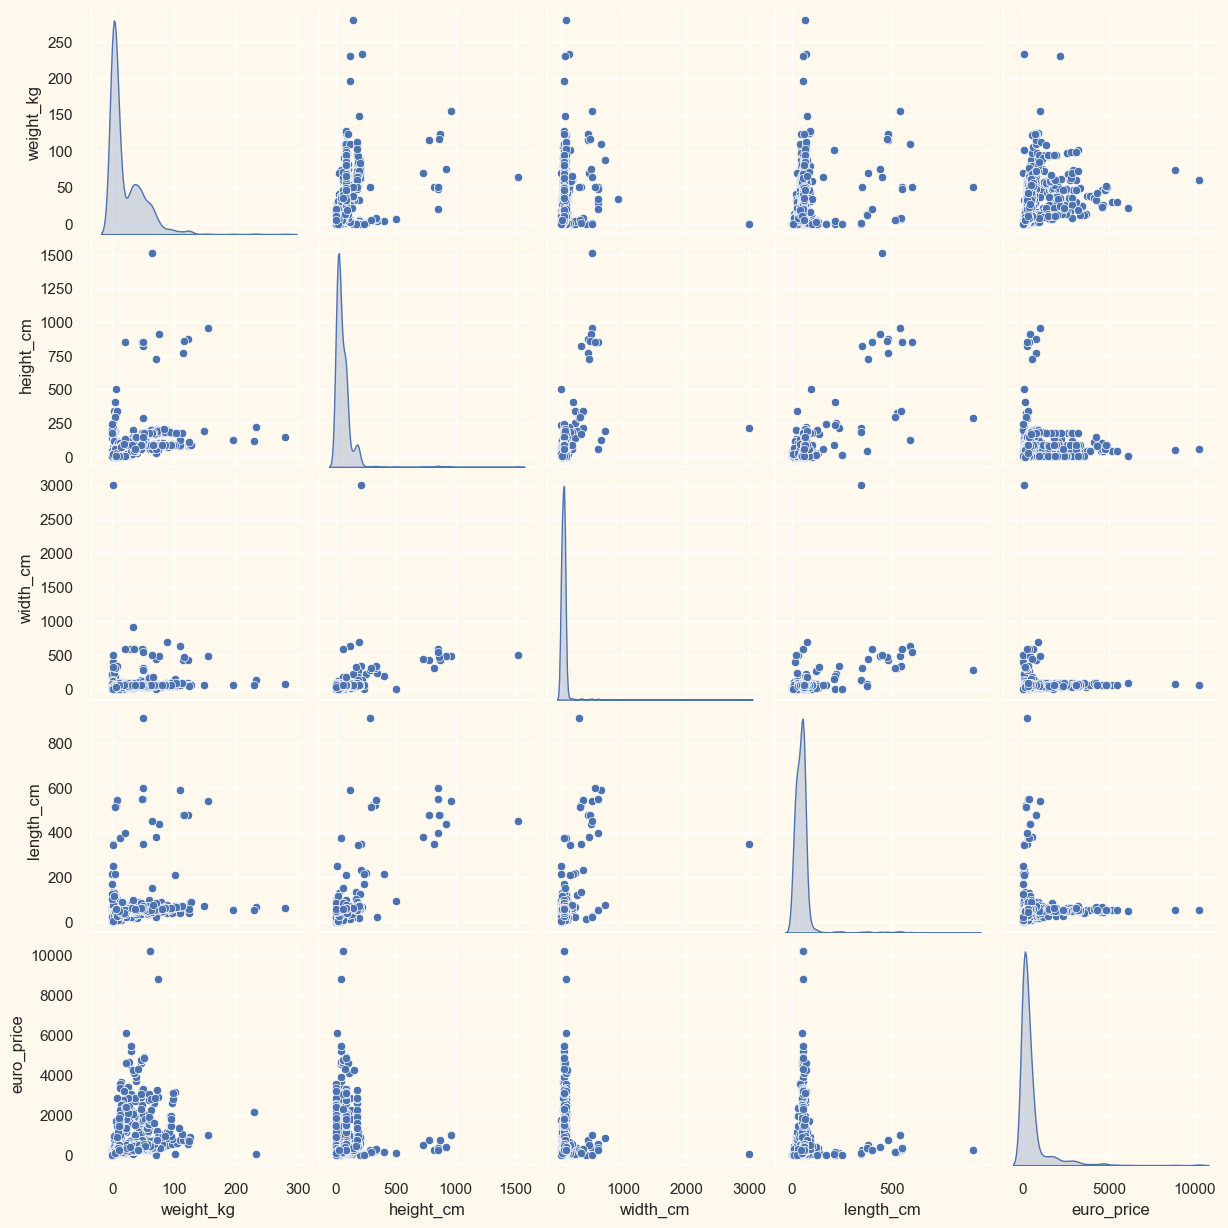

In [21]:
# select features to plot
to_plot = [ "weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# set color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# create pairplot
sns.pairplot(data[to_plot], diag_kind="kde", palette=pallet, height=2.5)

# show plot
plt.show()

From the pairplot it seems that we have a lot of outliers

I want to inspect outliers so in the fallowing code, the columns "weight_kg", "height_cm", "width_cm", "length_cm", and "euro_price" are defined as the columns to check for outliers.

Then, a loop is initiated to go through each column and find the outliers using the interquartile range (IQR) method. First, the first quartile (Q1), third quartile (Q3), and IQR values are calculated for each column. Then, the lower and upper bounds for the column are defined as Q1-1.5IQR and Q3+1.5IQR respectively.

After calculating the lower and upper bounds, the rows in the dataframe where the column value falls within these bounds are selected using boolean indexing and assigned back to the "data" variable.

Finally, the filtered "data" dataframe is displayed using the "display" function.

In [22]:
# Define the columns to check for outliers
columns_to_check = ["weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# Loop through each column and find the outliers using the IQR method
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    display(outliers)

Outliers in weight_kg:


,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
378,29808,303176,Mali kućanski aparati - Priprema hrane,TEFAL,HT310138,mikser-tefal-ht310138,24.0,102.0,84.0,147.0,211.0,39.68,298.97
460,73491,313080,Mali kućanski aparati - Osobna njega,PHILIPS,BG3015/15,aparat-za-brijanje-philips-bg3015-15,24.0,233.0,223.0,140.0,68.0,52.96,399.03
605,71491,369035,Hlađenje i grijanje,NaN,CV.,pec-amelia-cv,24.0,105.0,88.0,46.0,45.0,583.85,4399.02
607,71316,368789,Hlađenje i grijanje,ALFA PLAM,PLAM ŠTEDNJAK REGULAR-46*R*ECO*B-L,pec-alfa-plam-stednjak-regular-46-r-eco-b-l,24.0,122.0,85.0,92.0,57.0,530.76,3999.01
608,70753,368181,Hlađenje i grijanje,ALFA PLAM,Plam ŠTEDNJAK REGULAR-46*R*ECO*DELUX*ŠT-D,pec-alfa-plam-stednjak-regular-46-r-eco-delux-...,24.0,122.0,85.0,92.0,57.0,544.03,4098.99
609,70754,368182,Hlađenje i grijanje,ALFA PLAM,Plam ŠTEDNJAK REGULAR-46*R*ECO*DELUX*ŠT-L,pec-alfa-plam-stednjak-regular-46-r-eco-delux-...,24.0,122.0,85.0,92.0,57.0,544.03,4098.99
620,68272,365683,Hlađenje i grijanje,PRITY,FM,kamin-prity-fm,24.0,97.0,93.0,49.0,46.0,530.76,3999.01
639,67668,364372,Hlađenje i grijanje,ALFA PLAM,Amelia A,pec-alfa-plam-amelia-a,24.0,105.0,88.0,46.0,45.0,583.85,4399.02
640,67669,364373,Hlađenje i grijanje,ALFA PLAM,KAMINSKA GALA-B,pec-alfa-plam-kaminska-gala-b,24.0,97.0,98.0,60.0,43.0,809.48,6099.03
644,67236,363738,Hlađenje i grijanje,ALFA PLAM,PLAM ŠTEDNJAK 70 FAVORIT*ECO*B-L,pec-alfa-plam-stednjak-70-favorit-eco-b-l,24.0,110.0,85.0,60.0,70.0,756.39,5699.02


Outliers in height_cm:


,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
70,68091,313015,Mali kućanski aparati - Priprema hrane,PHILIPS,HR2744/40,citruseta-philips-hr2744-40,24.0,0.86,250.0,222.0,222.0,31.72,238.99
71,68095,313051,Mali kućanski aparati - Priprema hrane,PHILIPS,HR3745/00,mikser-s-posudom-philips-hr3745-00,24.0,NaN,210.0,350.0,235.0,76.85,579.03
145,63756,264119,Mali kućanski aparati - Priprema hrane,BOSCH,MUM48R1 MULTIFUNKCIONALNI,robotski-mikser-bosch-mum48r1-multifunkcionalni,24.0,5.00,193.0,80.0,120.0,115.05,866.84
147,63764,277562,Mali kućanski aparati - Priprema hrane,BOSCH,MUM48A1 MULTIFUNKCIONALNI,robotski-mikser-bosch-mum48a1-multifunkcionalni,24.0,5.00,193.0,80.0,120.0,159.13,1198.96
154,63739,226041,Mali kućanski aparati - Priprema hrane,BOSCH,BOSCH,mikser-s-posudom-mfq36460s-bosch,NaN,1.86,185.0,80.0,120.0,71.54,539.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,62236,358601,Bijela tehnika,BOSCH,KGN49XIEA,samostojeci-hladnjak-bosch-kgn49xiea,24.0,84.00,203.0,70.0,67.0,NaN,NaN
2080,62907,359457,Bijela tehnika,LG,GBP31DSLZN,samostojeci-hladnjak-lg-gbp31dslzn,24.0,66.00,186.0,60.0,68.0,NaN,NaN
2145,45097,333064,Bijela tehnika,MIELE,VINSKI KWT 6834 SGS,samostojeci-hladnjak-miele-vinski-kwt-6834-sgs,24.0,148.40,192.0,70.0,75.0,NaN,NaN
2149,38245,322810,Bijela tehnika,WHIRLPOOL,PRO ADN 231 BK RASHLADNA VITRINA,samostojeci-hladnjak-whirlpool-pro-adn-231-bk-...,24.0,65.00,1518.0,502.0,453.0,NaN,NaN


Outliers in width_cm:


,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
70,68091,313015,Mali kućanski aparati - Priprema hrane,PHILIPS,HR2744/40,citruseta-philips-hr2744-40,24.0,0.860,250.0,222.0,222.0,31.72,238.99
71,68095,313051,Mali kućanski aparati - Priprema hrane,PHILIPS,HR3745/00,mikser-s-posudom-philips-hr3745-00,24.0,NaN,210.0,350.0,235.0,76.85,579.03
117,67072,363459,Mali kućanski aparati - Priprema hrane,NaN,28X500CM 2 ROLE,pribor-za-vakumiranje-brt2805-28x500cm-2-role,24.0,0.600,NaN,500.0,28.0,9.16,69.02
118,67073,363460,Mali kućanski aparati - Priprema hrane,NaN,15X400CM 4 ROLE,pribor-za-vakumiranje-brt1504-15x400cm-4-role,24.0,0.540,NaN,400.0,15.0,7.83,59.00
123,67071,363458,Mali kućanski aparati - Priprema hrane,NaN,22X500CM 2 ROLE,pribor-za-vakumiranje-brt2205-22x500cm-2-role,24.0,0.460,NaN,500.0,22.0,7.83,59.00
322,72136,313055,Mali kućanski aparati - Osobna njega,PHILIPS,SC1997/00,ipl-philips-sc1997-00,24.0,0.719,190.0,266.0,120.0,344.95,2599.03
377,29552,302355,Mali kućanski aparati - Priprema hrane,TEFAL,BL811D38,blender-tefal-bl811d38,24.0,4.350,406.0,192.0,215.0,128.61,969.01
378,29808,303176,Mali kućanski aparati - Priprema hrane,TEFAL,HT310138,mikser-tefal-ht310138,24.0,102.000,84.0,147.0,211.0,39.68,298.97
379,29810,303179,Mali kućanski aparati - Priprema hrane,TEFAL,HT312138,mikser-s-posudom-tefal-ht312138,24.0,0.495,215.0,3002.0,348.0,71.54,539.02
452,74651,373220,Mali kućanski aparati - Osobna njega,PHILIPS,BRE255/00,epilator-philips-bre255-00,24.0,0.340,185.0,178.0,55.0,52.95,398.95


Outliers in length_cm:


,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
70,68091,313015,Mali kućanski aparati - Priprema hrane,PHILIPS,HR2744/40,citruseta-philips-hr2744-40,24.0,0.860,250.0,222.0,222.0,31.72,238.99
71,68095,313051,Mali kućanski aparati - Priprema hrane,PHILIPS,HR3745/00,mikser-s-posudom-philips-hr3745-00,24.0,NaN,210.0,350.0,235.0,76.85,579.03
145,63756,264119,Mali kućanski aparati - Priprema hrane,BOSCH,MUM48R1 MULTIFUNKCIONALNI,robotski-mikser-bosch-mum48r1-multifunkcionalni,24.0,5.000,193.0,80.0,120.0,115.05,866.84
147,63764,277562,Mali kućanski aparati - Priprema hrane,BOSCH,MUM48A1 MULTIFUNKCIONALNI,robotski-mikser-bosch-mum48a1-multifunkcionalni,24.0,5.000,193.0,80.0,120.0,159.13,1198.96
154,63739,226041,Mali kućanski aparati - Priprema hrane,BOSCH,BOSCH,mikser-s-posudom-mfq36460s-bosch,NaN,1.860,185.0,80.0,120.0,71.54,539.02
156,63741,226047,Mali kućanski aparati - Priprema hrane,BOSCH,BOSCH,multipraktik-mum4405-bosch,24.0,3.340,193.0,80.0,120.0,75.00,565.09
300,51351,341997,Mali kućanski aparati - Priprema hrane,EMOS,EV025,kuhinjska-vaga-emos-ev025,24.0,0.364,233.0,9.0,215.0,19.78,149.03
322,72136,313055,Mali kućanski aparati - Osobna njega,PHILIPS,SC1997/00,ipl-philips-sc1997-00,24.0,0.719,190.0,266.0,120.0,344.95,2599.03
377,29552,302355,Mali kućanski aparati - Priprema hrane,TEFAL,BL811D38,blender-tefal-bl811d38,24.0,4.350,406.0,192.0,215.0,128.61,969.01
378,29808,303176,Mali kućanski aparati - Priprema hrane,TEFAL,HT310138,mikser-tefal-ht310138,24.0,102.000,84.0,147.0,211.0,39.68,298.97


Outliers in euro_price:


,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
189,61562,357644,Mali kućanski aparati - Priprema hrane,MIELE,LADICA ZA EVS 7010 obsw,pribor-za-vakumiranje-miele-ladica-za-evs-7010...,24.0,29.20,14.0,60.0,57.0,2905.30,21889.98
190,61563,357645,Mali kućanski aparati - Priprema hrane,MIELE,LADICA ZA EVS 7010 grgr,pribor-za-vakumiranje-miele-ladica-za-evs-7010...,24.0,29.20,14.0,60.0,57.0,2905.30,21889.98
192,61587,357669,Mali kućanski aparati - Priprema hrane,MIELE,PARNA DG 6001 GOURMET STAR,miele-parna-dg-6001-gourmet-star,24.0,16.70,38.0,50.0,33.0,1153.36,8689.99
196,61590,357672,Mali kućanski aparati - Priprema hrane,MIELE,CM 5510 SILENCE PP,aparat-za-espresso-kavu-miele-cm-5510-silence-pp,24.0,9.50,36.0,24.0,46.0,1100.28,8290.06
197,61592,357674,Mali kućanski aparati - Priprema hrane,MIELE,CM 6160 MILK PERFECTION,aparat-za-espresso-kavu-miele-cm-6160-milk-per...,24.0,9.94,36.0,25.0,43.0,1445.35,10889.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,43480,330748,Bijela tehnika,MIELE,H 7264 BP edst,ugradbena-pecnica-miele-h-7264-bp-edst,24.0,47.00,58.0,55.0,55.0,2321.33,17490.06
1879,44504,332319,Bijela tehnika,MIELE,KM 7464 FR PP,ugradbena-elektricna-ploca-miele-km-7464-fr-pp,24.0,10.70,5.0,63.0,53.0,1445.35,10889.99
1880,43481,330749,Bijela tehnika,MIELE,F 31202 Ui,zamrzivac-miele-f-31202-ui,24.0,37.20,82.0,55.0,60.0,1511.71,11389.98
1881,44505,332320,Bijela tehnika,MIELE,KM 7564 FL,ugradbena-elektricna-ploca-miele-km-7564-fl,24.0,11.20,5.0,62.0,52.0,1870.06,14089.97


Through the inspection of outliers by this method, it is evident that a significant number of outliers are the result of wrong input, someone entered the dimensions in mm instead of cm.
So Insted of droping these rows, in next few lines we will try to deal with those outliers without removing it. 

In [23]:
# sort the dataframe by "height_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="height_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "height_cm" is greater than 100
filtered_data = sorted_data[sorted_data["height_cm"] > 200]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
650,66666,363080,Hlađenje i grijanje,BELLA THALIA,Thalia THALIA FORTE CRVENA,pec-bella-thalia-thalia-forte-crvena,12.0,75.000,915.0,490.0,440.0,384.76,2898.97
1329,68920,366396,Bijela tehnika,ALFA PLAM,S 140 55 43 G*6-R,elektricni-stednjak-alfa-plam-s-140-55-43-g-6-r,60.0,50.000,850.0,600.0,550.0,298.49,2248.97
1976,23485,283119,Bijela tehnika,ALFA PLAM,PLAM GAMA,plinski-stednjak-alfa-plam-gama,60.0,21.000,850.0,600.0,400.0,225.50,1699.03
1975,23484,283118,Bijela tehnika,ALFA PLAM,PLAM SG 122 55 13 GI/6,kombinirani-stednjak-alfa-plam-sg-122-55-13-gi-6,60.0,48.000,850.0,600.0,550.0,344.95,2599.03
691,41604,327967,Hlađenje i grijanje,ISKRA,KONVEKTOR PN2500,elektricna-grijalica-iskra-konvektor-pn2500,24.0,6.800,500.0,12.0,94.0,83.48,628.98
377,29552,302355,Mali kućanski aparati - Priprema hrane,TEFAL,BL811D38,blender-tefal-bl811d38,24.0,4.350,406.0,192.0,215.0,128.61,969.01
883,68098,313056,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9729/09,usisavac-bez-vrecice-philips-fc9729-09-1,24.0,7.200,340.0,350.0,545.0,265.31,1998.98
884,68099,313057,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9744/09,usisavac-bez-vrecice-philips-fc9744-09-1,24.0,8.100,340.0,350.0,545.0,301.15,2269.01
882,68097,313054,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9334/09,usisavac-bez-vrecice-philips-fc9334-09-1,24.0,6.500,325.0,320.0,525.0,196.30,1479.02
881,68096,313053,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9330/09,usisavac-bez-vrecice-philips-fc9330-09-1,24.0,5.800,315.0,320.0,525.0,156.48,1179.00


Here I found that all height_cm>200 results are actually mm so I will convert them to cm

In [24]:
data.loc[data["height_cm"] > 204, "height_cm"] /= 10

# sort the dataframe by "height_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="height_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "height_cm" is greater than 100
filtered_data = sorted_data[sorted_data["height_cm"] > 200]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
1372,67198,363649,Bijela tehnika,SAMSUNG,RB38T675ESA/EF,samostojeci-hladnjak-samsung-rb38t675esa-ef,24.0,71.0,203.0,60.0,66.0,769.66,5799.00
1507,62235,358600,Bijela tehnika,BOSCH,KGV39VLEA,samostojeci-hladnjak-bosch-kgv39vlea,24.0,71.9,201.0,60.0,65.0,690.03,5199.03
1669,57395,351459,Bijela tehnika,KONČAR,HC1A60379NF.BFN,samostojeci-hladnjak-koncar-hc1a60379nf-bfn,60.0,80.0,201.0,60.0,65.0,517.49,3899.03
1686,56151,349170,Bijela tehnika,CANDY,CMDNB 6204X1N,samostojeci-hladnjak-candy-cmdnb-6204x1n,24.0,69.0,201.0,60.0,64.0,703.30,5299.01
1813,48820,338321,Bijela tehnika,ELECTROLUX,LNT7ME34K1,samostojeci-hladnjak-electrolux-lnt7me34k1,24.0,73.5,201.0,60.0,64.0,875.84,6599.02
1703,55060,347523,Bijela tehnika,KONČAR,HC1A60379NF.SFN,samostojeci-hladnjak-koncar-hc1a60379nf-sfn,60.0,80.0,201.0,60.0,65.0,530.76,3999.01


In [25]:
# sort the dataframe by "width_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="width_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "widith_cm" is greater than 100
filtered_data = sorted_data[sorted_data["width_cm"] > 100]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
379,29810,303179,Mali kućanski aparati - Priprema hrane,TEFAL,HT312138,mikser-s-posudom-tefal-ht312138,24.0,0.495,21.5,3002.0,348.0,71.54,539.02
1509,62237,358602,Bijela tehnika,BOSCH,KGV58VLEAS,samostojeci-hladnjak-bosch-kgv58vleas,24.0,87.800,191.0,700.0,77.0,862.57,6499.03
1976,23485,283119,Bijela tehnika,ALFA PLAM,PLAM GAMA,plinski-stednjak-alfa-plam-gama,60.0,21.000,85.0,600.0,400.0,225.50,1699.03
1975,23484,283118,Bijela tehnika,ALFA PLAM,PLAM SG 122 55 13 GI/6,kombinirani-stednjak-alfa-plam-sg-122-55-13-gi-6,60.0,48.000,85.0,600.0,550.0,344.95,2599.03
1329,68920,366396,Bijela tehnika,ALFA PLAM,S 140 55 43 G*6-R,elektricni-stednjak-alfa-plam-s-140-55-43-g-6-r,60.0,50.000,85.0,600.0,550.0,298.49,2248.97
1333,68926,366404,Bijela tehnika,GORENJE,BOS6727SYB,ugradbena-pecnica-gorenje-bos6727syb,60.0,28.400,60.0,595.0,56.0,448.47,3379.00
1334,68927,366405,Bijela tehnika,GORENJE,BPS6737E14BG,ugradbena-pecnica-gorenje-bps6737e14bg,60.0,34.400,60.0,595.0,56.0,557.30,4198.98
650,66666,363080,Hlađenje i grijanje,BELLA THALIA,Thalia THALIA FORTE CRVENA,pec-bella-thalia-thalia-forte-crvena,12.0,75.000,91.5,490.0,440.0,384.76,2898.97
883,68098,313056,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9729/09,usisavac-bez-vrecice-philips-fc9729-09-1,24.0,7.200,34.0,350.0,545.0,265.31,1998.98
884,68099,313057,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9744/09,usisavac-bez-vrecice-philips-fc9744-09-1,24.0,8.100,34.0,350.0,545.0,301.15,2269.01


Same here for width, all resluts with "width_cm" > 139 needs to be converted to cm with 4 exceptions.

In [26]:
# filter the original dataframe to exclude rows where "height_cm" is greater than 204
indices_to_exclude = [1742, 1814, 1336, 1337]
condition = (data["width_cm"] > 139) & (~data.index.isin(indices_to_exclude))
data.loc[condition, "width_cm"] /= 10
# display the filtered dataframe
# sort the dataframe by "width_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="width_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "widith_cm" is greater than 100
filtered_data = sorted_data[sorted_data["width_cm"] > 100]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
379,29810,303179,Mali kućanski aparati - Priprema hrane,TEFAL,HT312138,mikser-s-posudom-tefal-ht312138,24.0,0.495,21.5,300.2,348.0,71.54,539.02
1336,68930,366408,Bijela tehnika,GORENJE,R619FES5,samostojeci-hladnjak-gorenje-r619fes5,60.0,60.000,60.0,185.0,66.0,548.01,4128.98
1814,50358,340187,Bijela tehnika,GORENJE,FH451CW,skrinja-gorenje-fh451cw,60.0,57.000,85.0,150.0,74.0,477.67,3599.00
1742,53357,344888,Bijela tehnika,WHIRLPOOL,WHM4611 2,skrinja-whirlpool-whm4611-2,24.0,46.900,92.0,141.0,70.0,636.94,4799.02
1812,48804,338287,Bijela tehnika,GORENJE,FH401CW,skrinja-gorenje-fh401cw,60.0,50.500,85.0,130.0,74.0,417.94,3148.97
1053,55558,348364,Mali kućanski aparati - Kućanstvo,TECRO,PVSU-T806BLDCW OCEAN WAVE,stapni-usisavac-tecro-pvsu-t806bldcw-ocean-wave,24.0,1.400,23.0,120.0,25.0,198.95,1498.99
1058,55562,348368,Mali kućanski aparati - Kućanstvo,TECRO,PVSU-T706B OCEAN WAVE,stapni-usisavac-tecro-pvsu-t706b-ocean-wave,24.0,1.400,23.0,120.0,25.0,132.59,999.00
1662,57350,351409,Bijela tehnika,KONČAR,LV1A300BMN,skrinja-koncar-lv1a300bmn,60.0,42.000,85.0,112.0,67.0,344.95,2599.03
1810,48802,338285,Bijela tehnika,GORENJE,FH301CW,skrinja-gorenje-fh301cw,60.0,43.000,85.0,108.0,74.0,427.23,3218.96
1811,48803,338286,Bijela tehnika,GORENJE,FH302CW,skrinja-gorenje-fh302cw,60.0,43.000,85.0,108.0,74.0,448.47,3379.00


In [27]:
# sort the dataframe by "width_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="length_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "widith_cm" is greater than 100
filtered_data = sorted_data[sorted_data["length_cm"] > 100]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
651,66668,363082,Hlađenje i grijanje,BELLA THALIA,Thalia THALIA EWA SIVA,pec-bella-thalia-thalia-ewa-siva,12.0,50.000,29.0,29.0,910.0,252.04,1899.00
1975,23484,283118,Bijela tehnika,ALFA PLAM,PLAM SG 122 55 13 GI/6,kombinirani-stednjak-alfa-plam-sg-122-55-13-gi-6,60.0,48.000,85.0,60.0,550.0,344.95,2599.03
1329,68920,366396,Bijela tehnika,ALFA PLAM,S 140 55 43 G*6-R,elektricni-stednjak-alfa-plam-s-140-55-43-g-6-r,60.0,50.000,85.0,60.0,550.0,298.49,2248.97
883,68098,313056,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9729/09,usisavac-bez-vrecice-philips-fc9729-09-1,24.0,7.200,34.0,35.0,545.0,265.31,1998.98
884,68099,313057,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9744/09,usisavac-bez-vrecice-philips-fc9744-09-1,24.0,8.100,34.0,35.0,545.0,301.15,2269.01
881,68096,313053,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9330/09,usisavac-bez-vrecice-philips-fc9330-09-1,24.0,5.800,31.5,32.0,525.0,156.48,1179.00
882,68097,313054,Mali kućanski aparati - Kućanstvo,PHILIPS,FC9334/09,usisavac-bez-vrecice-philips-fc9334-09-1,24.0,6.500,32.5,32.0,525.0,196.30,1479.02
885,68100,313060,Mali kućanski aparati - Kućanstvo,PHILIPS,FC8243/09,usisavac-s-vrecicom-philips-fc8243-09,24.0,5.100,29.5,31.5,515.0,152.50,1149.01
650,66666,363080,Hlađenje i grijanje,BELLA THALIA,Thalia THALIA FORTE CRVENA,pec-bella-thalia-thalia-forte-crvena,12.0,75.000,91.5,49.0,440.0,384.76,2898.97
1976,23485,283119,Bijela tehnika,ALFA PLAM,PLAM GAMA,plinski-stednjak-alfa-plam-gama,60.0,21.000,85.0,60.0,400.0,225.50,1699.03


And finally for lenghth, all results ("length_cm" > 119) are converted to cm

In [28]:
data.loc[data["length_cm"] > 119, "length_cm"] /= 10

# sort the dataframe by "height_cm" column in descending order and drop any rows with missing values
sorted_data = data.sort_values(by="length_cm", ascending=False).dropna()

# filter the sorted dataframe to include only rows where "height_cm" is greater than 100
filtered_data = sorted_data[sorted_data["length_cm"] > 100]

# display the filtered dataframe
display(filtered_data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
1047,57075,350721,Mali kućanski aparati - Kućanstvo,ROIDMI,S1E PLAVI,stapni-usisavac-roidmi-s1e-plavi,24.0,2.6,16.0,26.0,119.0,198.95,1498.99
1049,57087,350733,Mali kućanski aparati - Kućanstvo,ROIDMI,X30,stapni-usisavac-roidmi-x30,24.0,2.7,17.0,26.0,119.0,398.04,2999.03
1046,57073,350719,Mali kućanski aparati - Kućanstvo,ROIDMI,X20,stapni-usisavac-roidmi-x20,24.0,2.6,16.0,26.0,119.0,391.40,2949.00


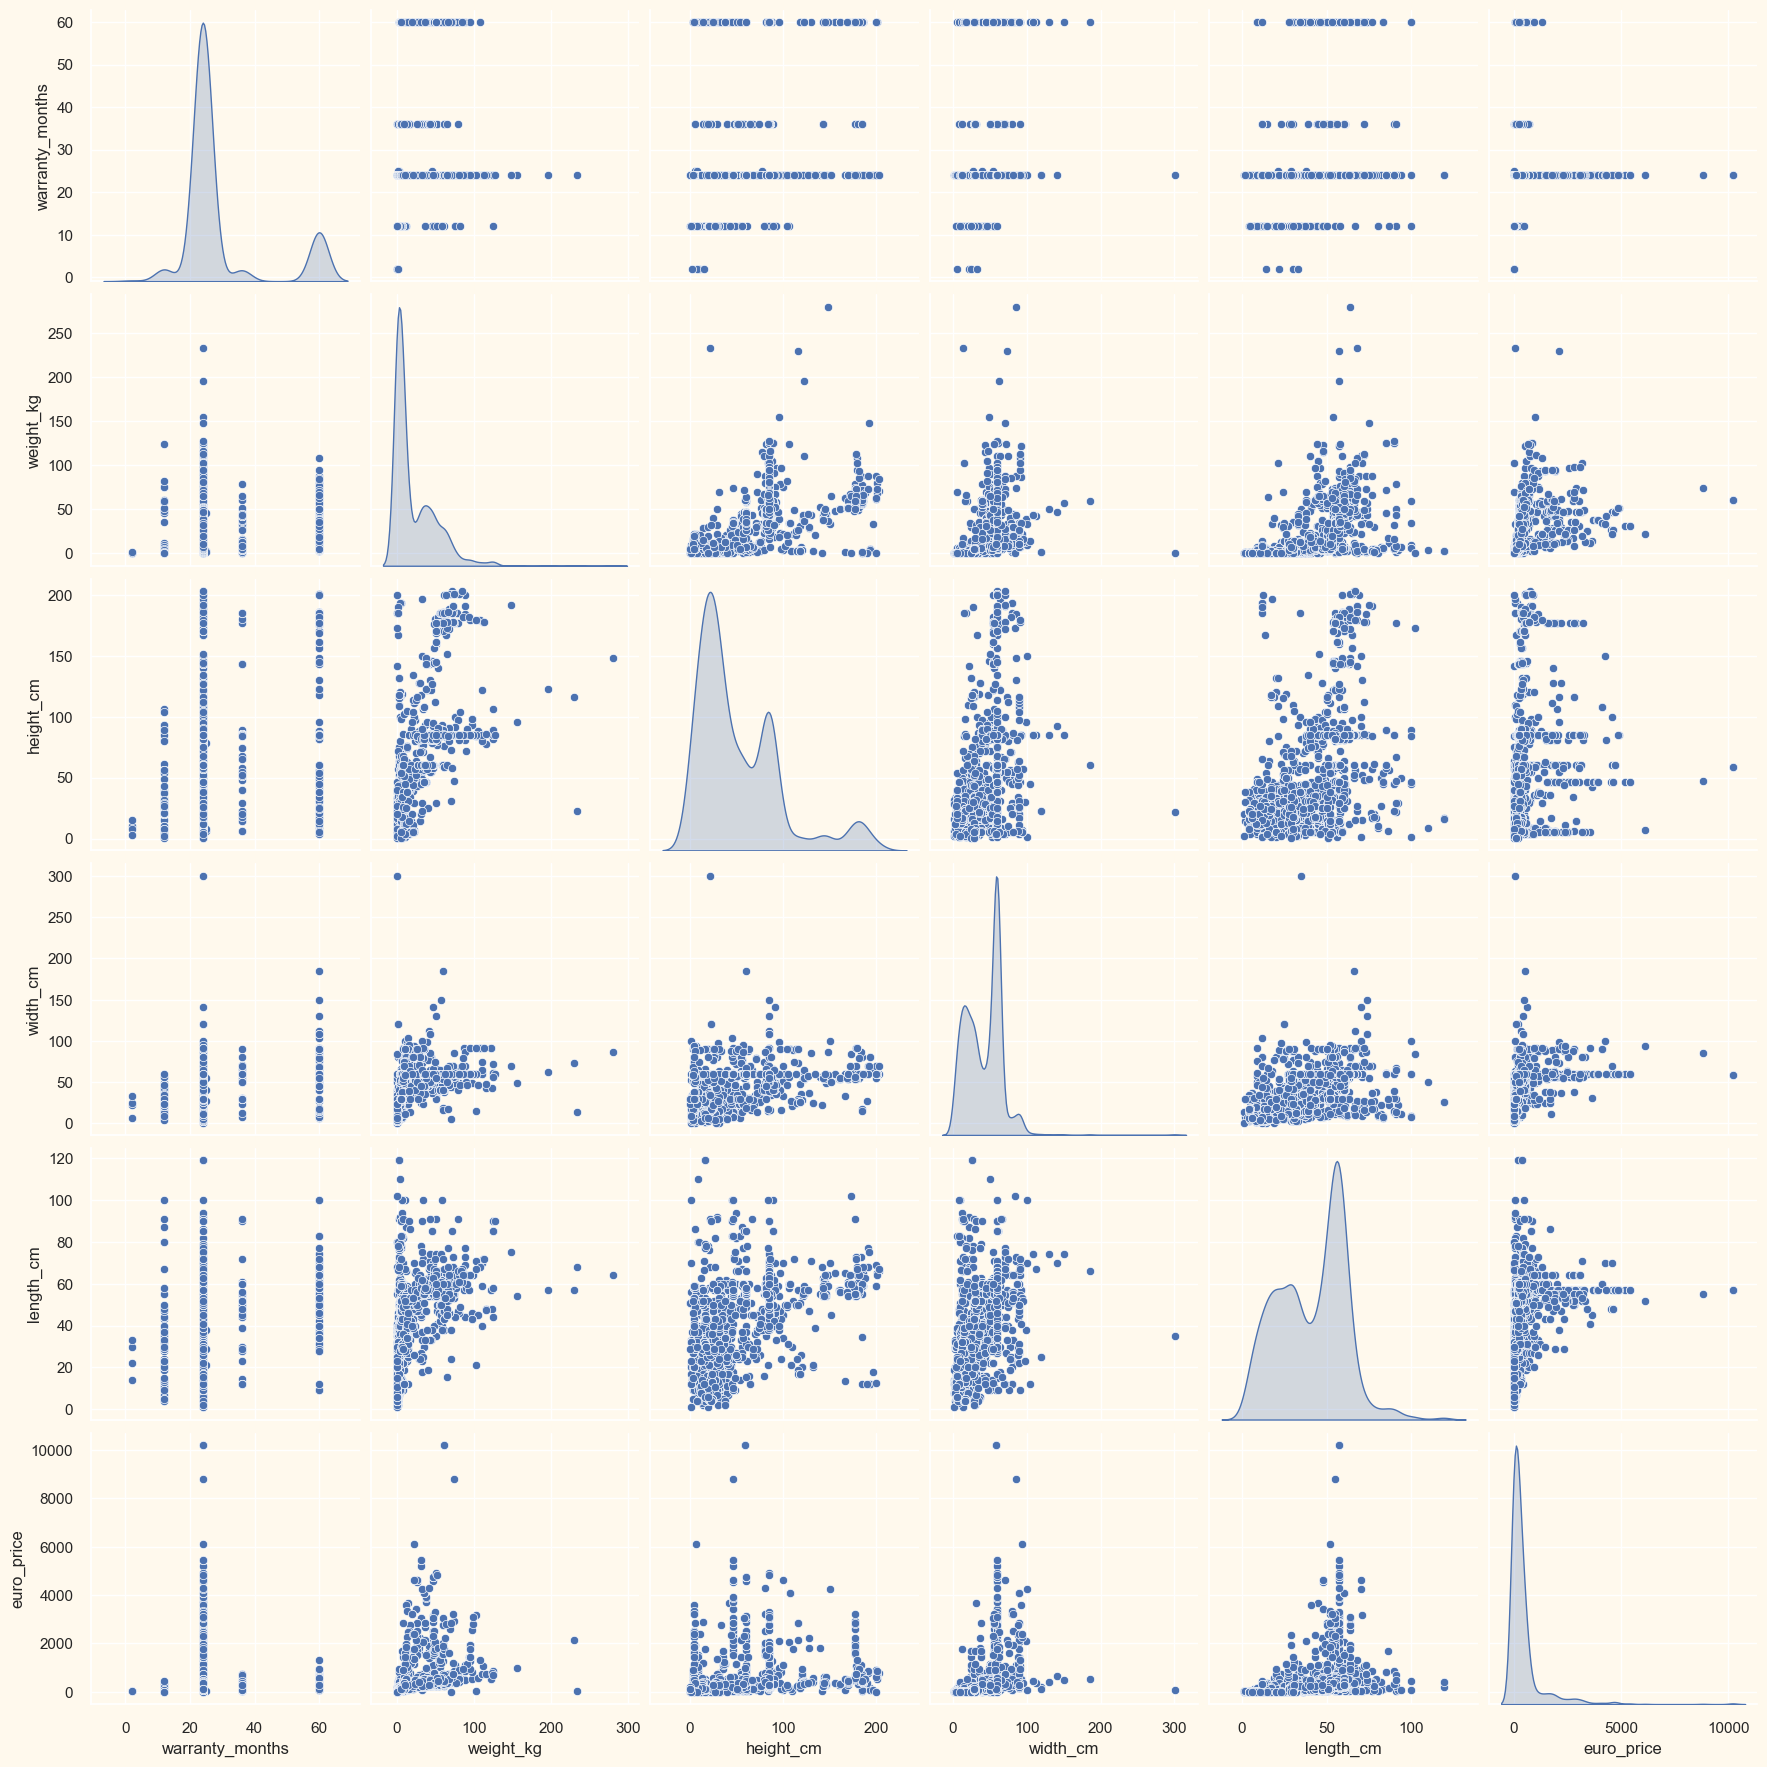

In [29]:
# select features to plot
to_plot = ["warranty_months", "weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# set color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# create pairplot
sns.pairplot(data[to_plot], diag_kind="kde", palette=pallet, height=3)

# show plot
plt.show()

Now we have much clearer picture but there are still some outliers to remove

In [30]:
# filter the original dataframe to exclude rows where "height_cm" is greater than 204
data = data[data["euro_price"] <= 6000]
data =data[data["weight_kg"]<=150]
data = data[data["width_cm"] <= 184]

In [31]:
display(data)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
0,75807,374963,Mali kućanski aparati - Priprema hrane,GORENJE,MC 06MBK EKSPRESS LONAC,elektricno-kuhalo-gorenje-mc-06mbk-ekspress-lonac,24.0,5.800,32.00,33.0,31.0,99.41,749.00
1,75804,374958,Mali kućanski aparati - Priprema hrane,BOSCH,MSM4B620 SET,stapni-mikser-bosch-msm4b620-set,24.0,1.200,39.00,6.0,8.0,78.17,588.97
2,75573,374526,Mali kućanski aparati - Priprema hrane,PHILIPS,HR2041/00,blender-philips-phil-hr2041-00,24.0,1.580,35.00,25.0,22.0,43.67,329.03
3,75229,374018,Mali kućanski aparati - Priprema hrane,ARDES,AR1PA1/Z,kuhinjska-vaga-ardes-ar1pa1-z,24.0,0.350,2.00,17.0,21.0,10.49,79.04
4,75077,51760,Mali kućanski aparati - Priprema hrane,ELIT,KP-1,elektricna-prijenosna-ploca-elit-kp-1,24.0,2.100,31.00,8.0,27.0,19.90,149.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,9695,64436,Bijela tehnika,XAVAX,STAKLOKERAMIČKE PLOČE XAVAX,sredstvo-za-ciscenje-bijele-tehnike-strugac-st...,12.0,0.086,1.70,9.3,23.2,8.49,63.97
1998,9202,55666,Bijela tehnika,CANDY,32 SPX CANDY,ugradbena-plinska-ploca-cdg-32-spx-candy,24.0,6.000,0.45,29.0,51.0,123.30,929.00
1999,9203,55676,Bijela tehnika,CANDY,32 X CANDY,ugradbena-elektricna-ploca-cde-32-x-candy,24.0,5.000,0.45,29.0,51.0,99.41,749.00
2000,13823,226845,Bijela tehnika,KONČAR,SE 5013 P.BHO KONČAR,kombinirani-stednjak-ep-se-5013-p-bho-koncar,36.0,42.000,85.00,50.0,60.0,265.31,1998.98


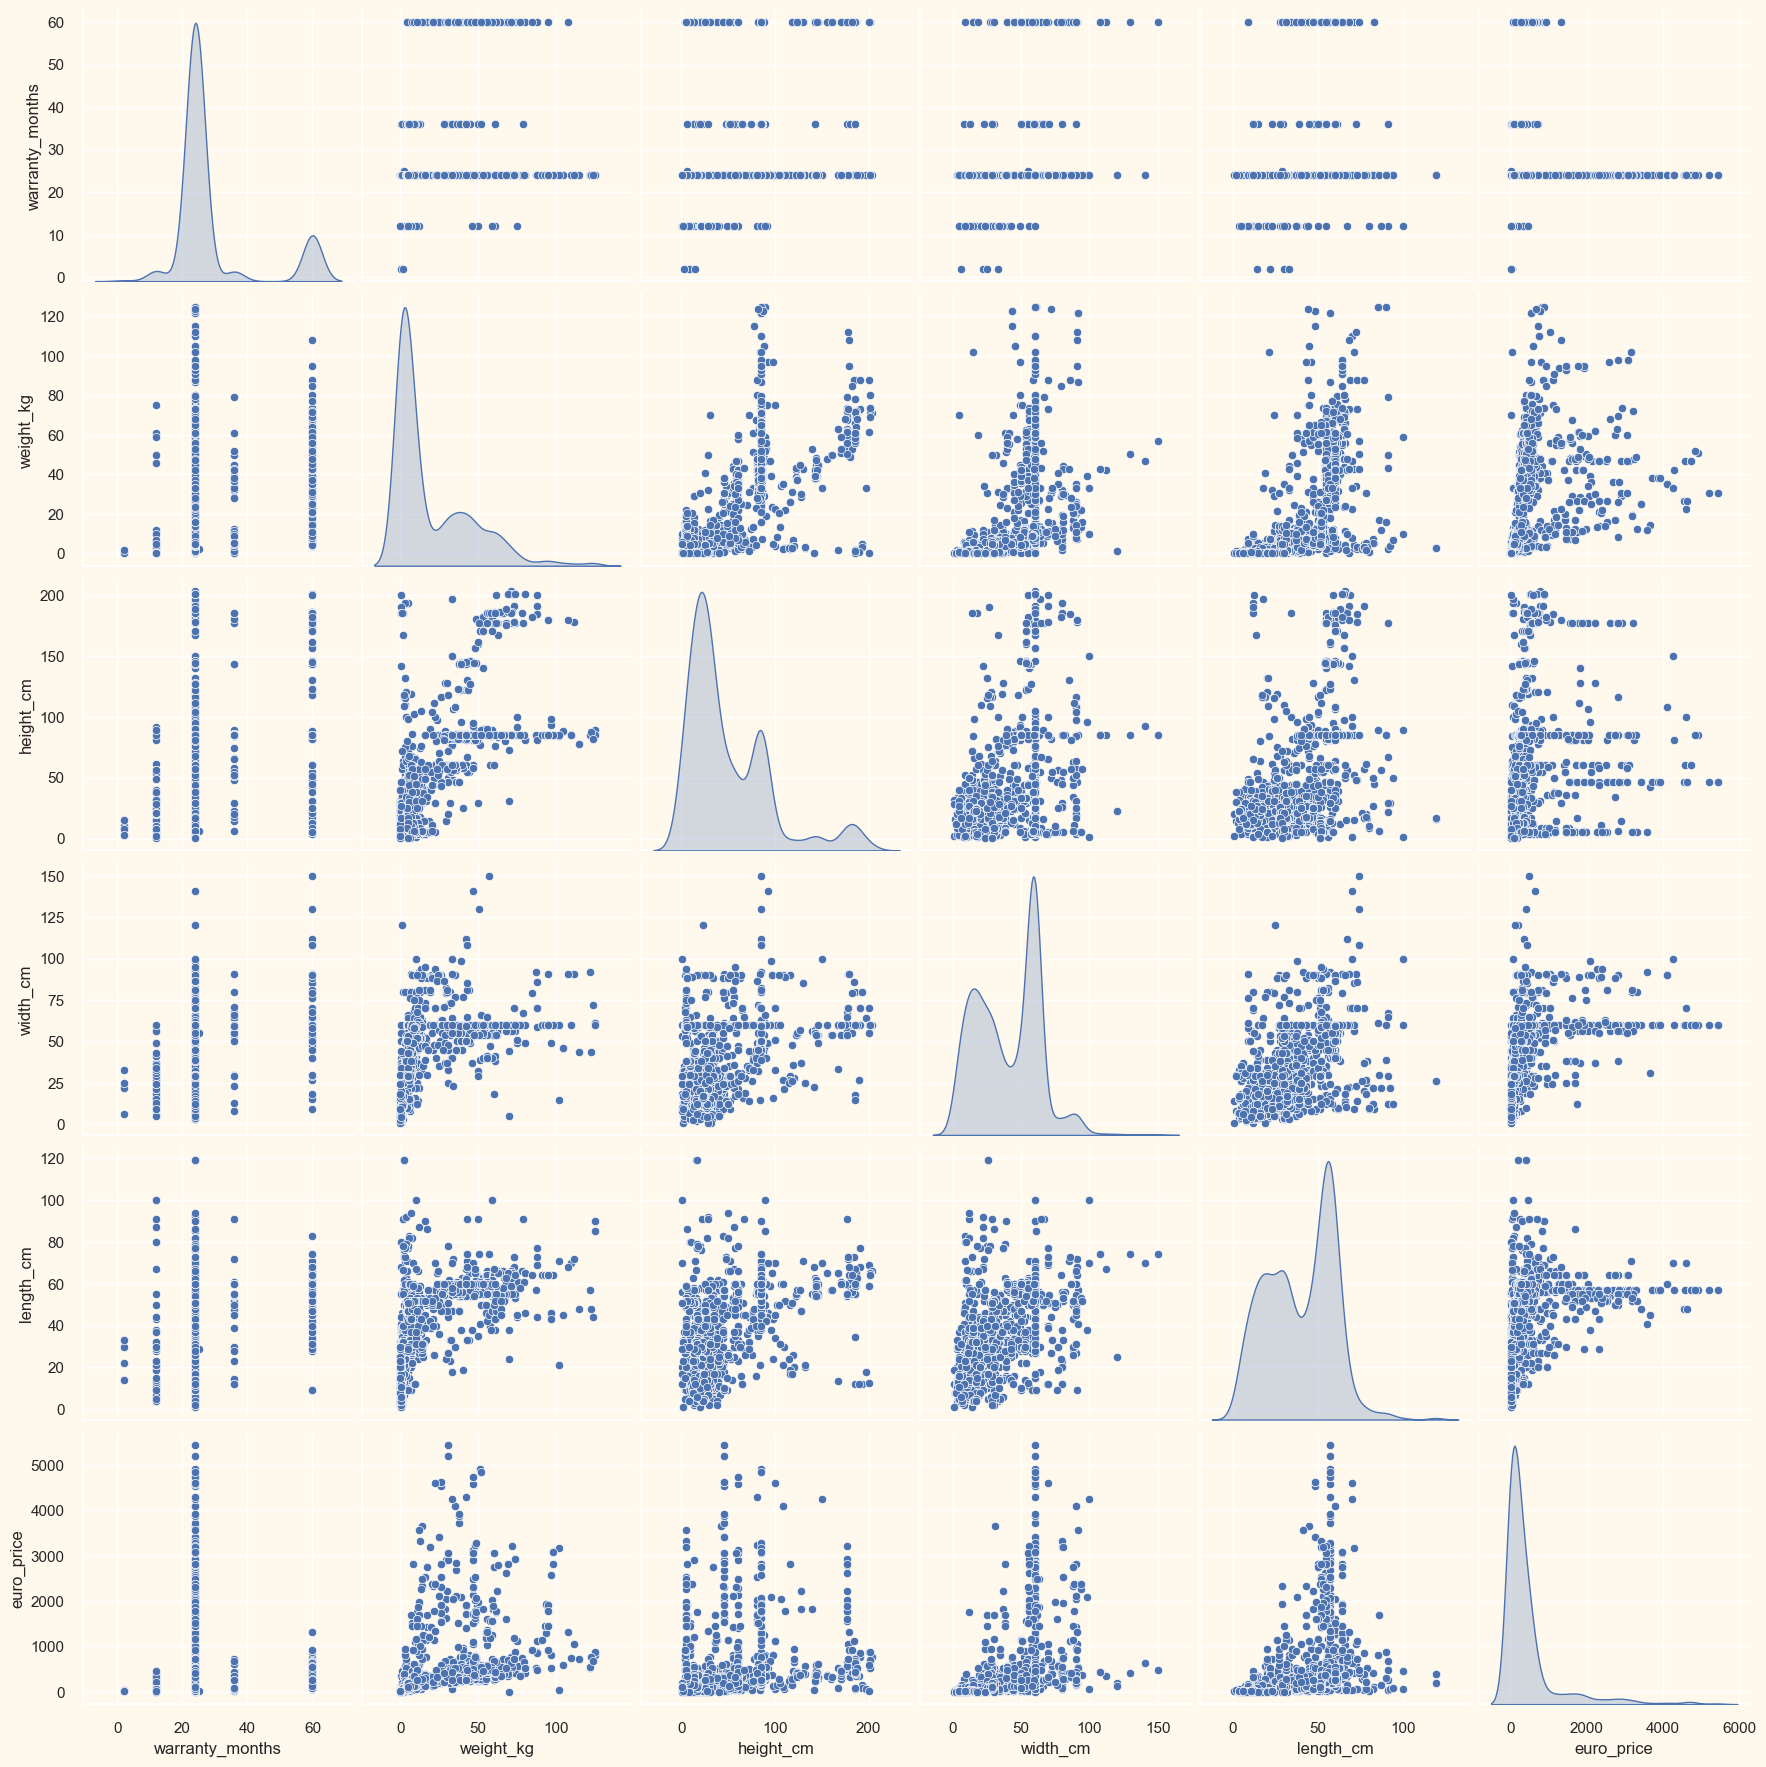

In [32]:
# select features to plot
to_plot = ["warranty_months", "weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# set color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# create pairplot
sns.pairplot(data[to_plot], diag_kind="kde", palette=pallet, height=3)

# show plot
plt.show()

In order to preform Kmeans clustering we are going to preform additonal cleaning with IQR method. Similar how we initally checked for outliers, The code calculates the lower and upper bounds for each column using the IQR method and then creates a new dataframe dataIQR that contains only the rows that fall within the bounds.

In [33]:
# Define the columns to check for outliers
columns_to_check = ["weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# Loop through each column and find the outliers using the IQR method
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataIQR = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
display(dataIQR)

,product_id,code,category,brand,model,model_description,warranty_months,weight_kg,height_cm,width_cm,length_cm,euro_price,kuna_price
0,75807,374963,Mali kućanski aparati - Priprema hrane,GORENJE,MC 06MBK EKSPRESS LONAC,elektricno-kuhalo-gorenje-mc-06mbk-ekspress-lonac,24.0,5.800,32.00,33.0,31.0,99.41,749.00
1,75804,374958,Mali kućanski aparati - Priprema hrane,BOSCH,MSM4B620 SET,stapni-mikser-bosch-msm4b620-set,24.0,1.200,39.00,6.0,8.0,78.17,588.97
2,75573,374526,Mali kućanski aparati - Priprema hrane,PHILIPS,HR2041/00,blender-philips-phil-hr2041-00,24.0,1.580,35.00,25.0,22.0,43.67,329.03
3,75229,374018,Mali kućanski aparati - Priprema hrane,ARDES,AR1PA1/Z,kuhinjska-vaga-ardes-ar1pa1-z,24.0,0.350,2.00,17.0,21.0,10.49,79.04
4,75077,51760,Mali kućanski aparati - Priprema hrane,ELIT,KP-1,elektricna-prijenosna-ploca-elit-kp-1,24.0,2.100,31.00,8.0,27.0,19.90,149.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,9695,64436,Bijela tehnika,XAVAX,STAKLOKERAMIČKE PLOČE XAVAX,sredstvo-za-ciscenje-bijele-tehnike-strugac-st...,12.0,0.086,1.70,9.3,23.2,8.49,63.97
1998,9202,55666,Bijela tehnika,CANDY,32 SPX CANDY,ugradbena-plinska-ploca-cdg-32-spx-candy,24.0,6.000,0.45,29.0,51.0,123.30,929.00
1999,9203,55676,Bijela tehnika,CANDY,32 X CANDY,ugradbena-elektricna-ploca-cde-32-x-candy,24.0,5.000,0.45,29.0,51.0,99.41,749.00
2000,13823,226845,Bijela tehnika,KONČAR,SE 5013 P.BHO KONČAR,kombinirani-stednjak-ep-se-5013-p-bho-koncar,36.0,42.000,85.00,50.0,60.0,265.31,1998.98


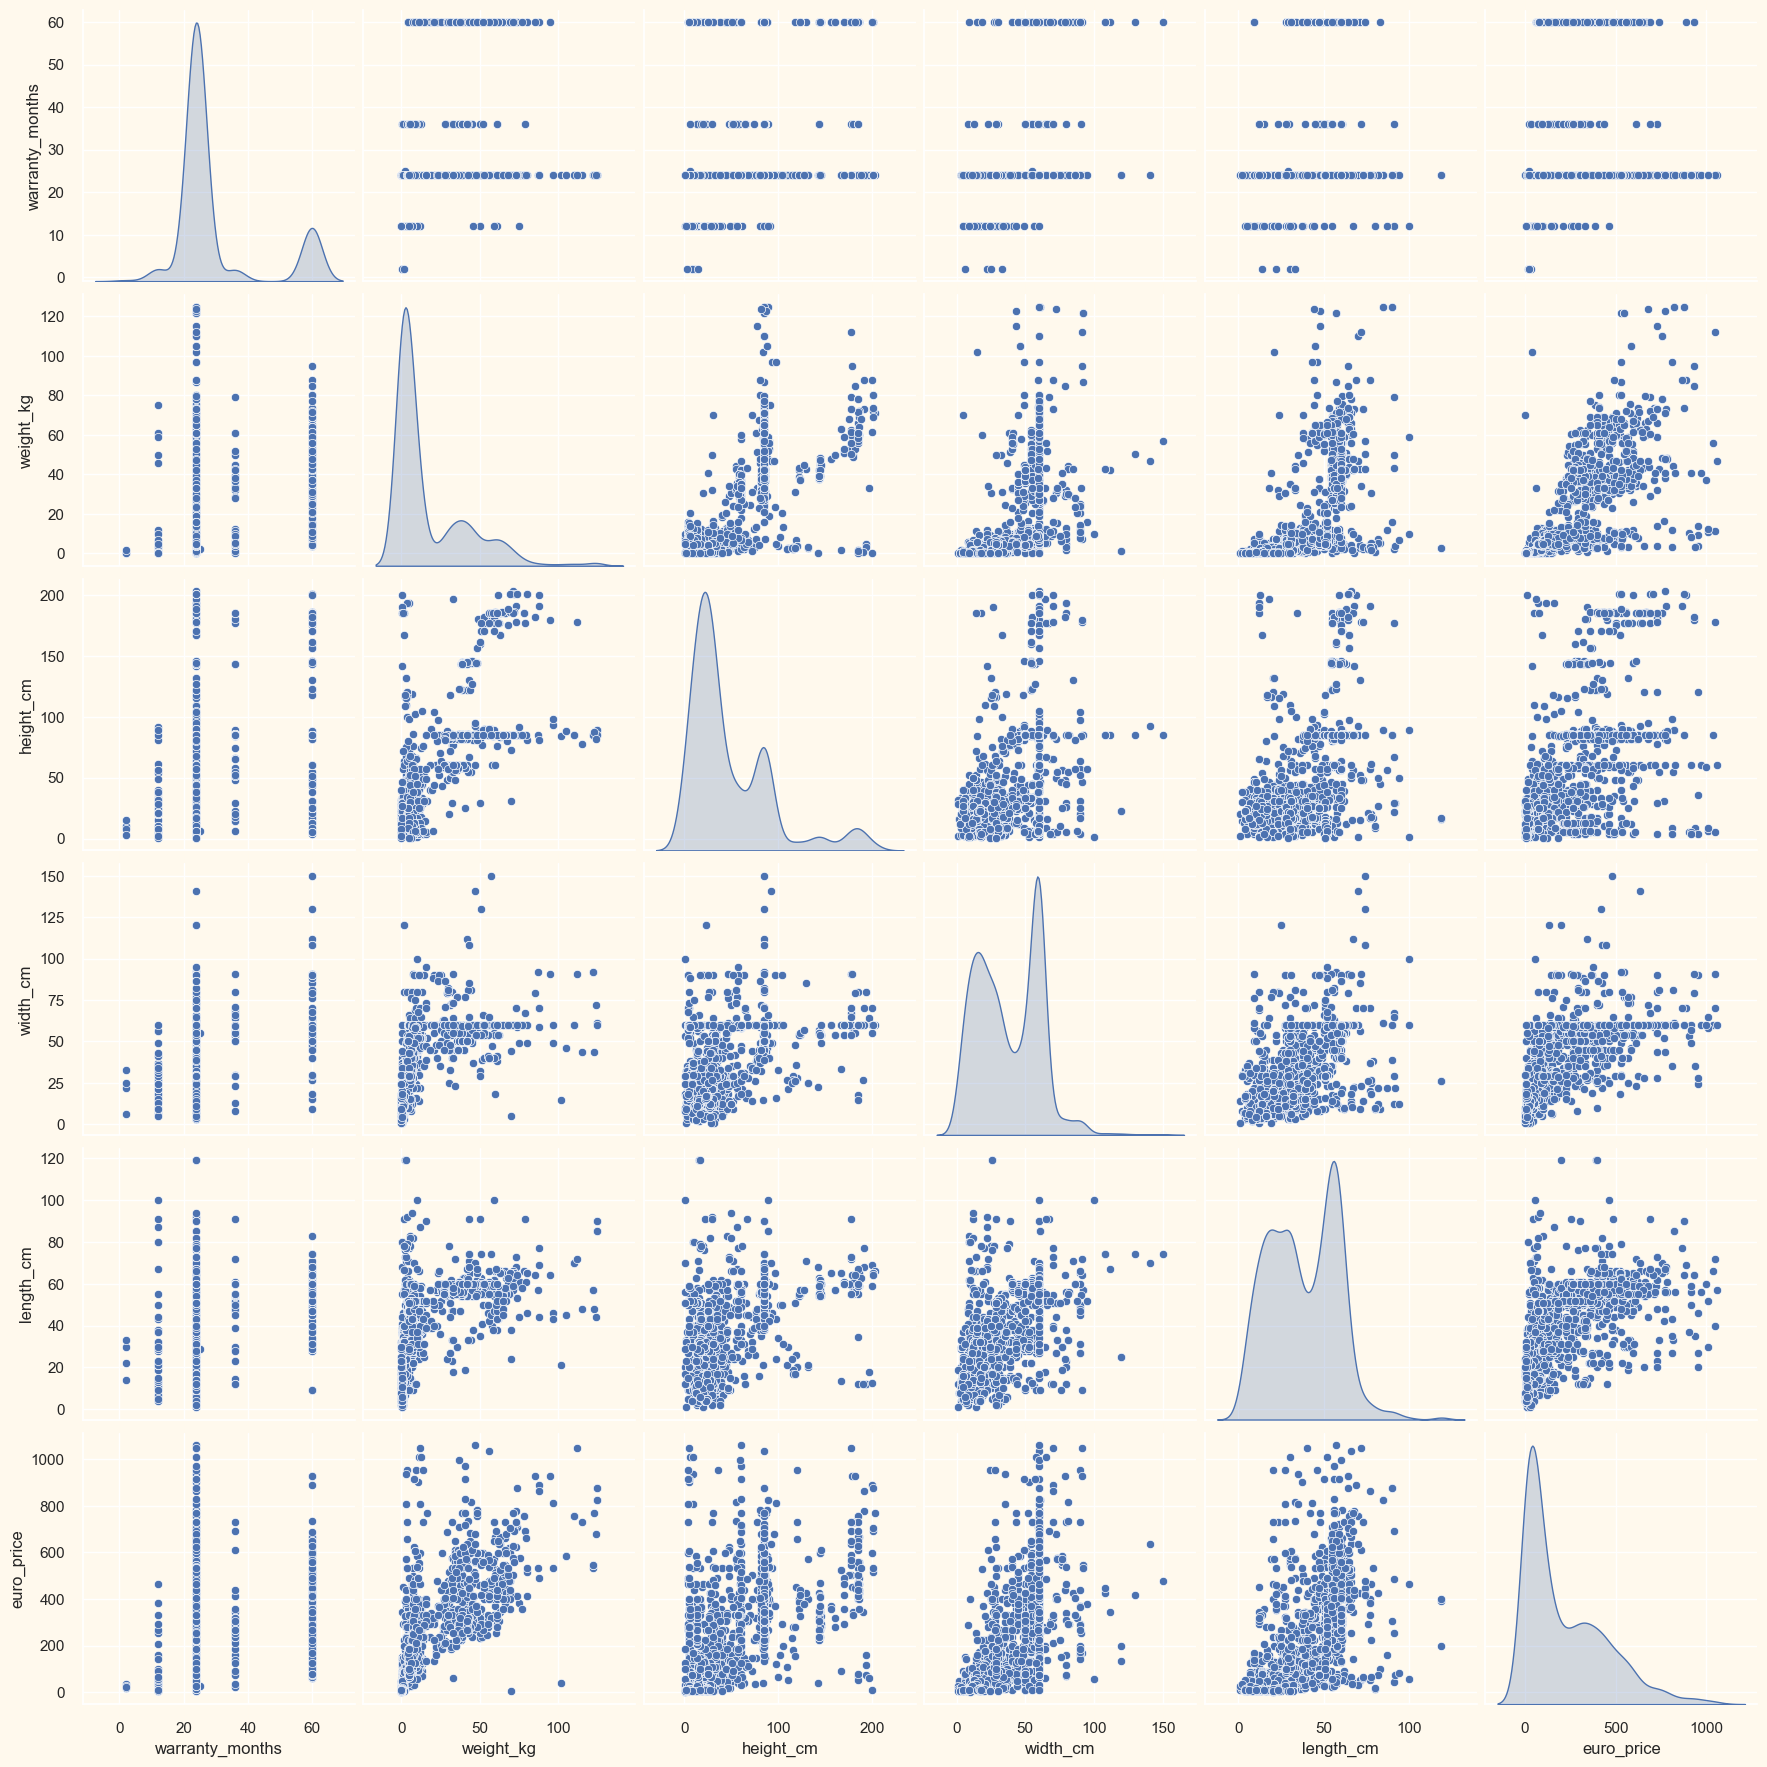

In [34]:
# select features to plot
to_plot = ["warranty_months", "weight_kg", "height_cm", "width_cm", "length_cm", "euro_price"]

# set color preferences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# create pairplot
sns.pairplot(dataIQR[to_plot], diag_kind="kde", palette=pallet, height=3)

# show plot
plt.show()

Now when I cleaned the data I am going to create a new column. With the next code a new column 'size_cm3' is added to the dataframe by multiplying the values in the 'height_cm', 'width_cm', and 'length_cm' columns.

In [35]:
dataIQR['size_cm3'] = dataIQR['height_cm'] * dataIQR['width_cm'] * dataIQR['length_cm']

From the newly created column "size_cm3", based on one of global logistics and shipping company's categorization of package size, I decided to create another column size_cat, a categorical variable. The function "get_size_category" takes the "size_cm3" value as input and returns a string category based on the conditions defined in the function. The new column "size_cat" is created using the apply() function, which applies the "get_size_category" function to each row of the "size_cm3" column and assigns the corresponding category value to the "size_cat" column. 

In [36]:
def get_size_category(size_cm3):
    if size_cm3 < 10890:
        return 's'
    elif size_cm3 < 35904:
        return 'm'
    elif size_cm3 < 72960:
        return 'l'
    else:
        return 'xl'

dataIQR['size_cat'] = dataIQR['size_cm3'].apply(get_size_category)

print(dataIQR.head())

   product_id    code                                category    brand  \
0       75807  374963  Mali kućanski aparati - Priprema hrane  GORENJE   
1       75804  374958  Mali kućanski aparati - Priprema hrane    BOSCH   
2       75573  374526  Mali kućanski aparati - Priprema hrane  PHILIPS   
3       75229  374018  Mali kućanski aparati - Priprema hrane    ARDES   
4       75077   51760  Mali kućanski aparati - Priprema hrane     ELIT   

                     model                                  model_description  \
0  MC 06MBK EKSPRESS LONAC  elektricno-kuhalo-gorenje-mc-06mbk-ekspress-lonac   
1             MSM4B620 SET                   stapni-mikser-bosch-msm4b620-set   
2                HR2041/00                     blender-philips-phil-hr2041-00   
3                 AR1PA1/Z                      kuhinjska-vaga-ardes-ar1pa1-z   
4                     KP-1              elektricna-prijenosna-ploca-elit-kp-1   

   warranty_months  weight_kg  height_cm  width_cm  length_cm  euro_

Finally in this section, lets see correlation matrix. From the correlation matrix, we can see that the variable weight_kg is a variable that is significantly correlated with the majority of variables in our dataset.
We can see that it has the highest correlations with "size_cm3" (0.81), euro_price" and "kuna_price"(0.76), "height_cm" (0.74). This suggests that there is relationship between the weight of the product and its size and price.

<Axes: >

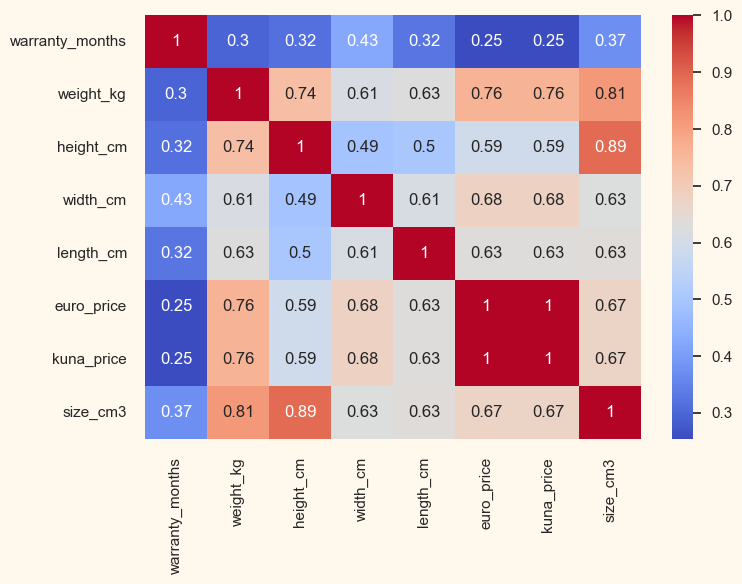

In [37]:
corrdf = dataIQR.drop(['product_id', 'code'], axis=1)
sns.heatmap(corrdf.corr(), annot=True,cmap='coolwarm')

To wrap it up, data cleaning has been done in this section. As a result of that, we have a cleaned dataset 'data' and an additional dataset 'dataIQR' which was cleaned using the IQR method. In the next steps, we will perform Descriptive analysis on the 'data' dataset and then Kmeans clustering on the 'dataIQR' dataset.

# Descriptive Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The most frequent brands in the offer:
MIELE      220
GORENJE    202
PHILIPS    131
KONČAR     121
CANDY      102
Name: brand, dtype: int64


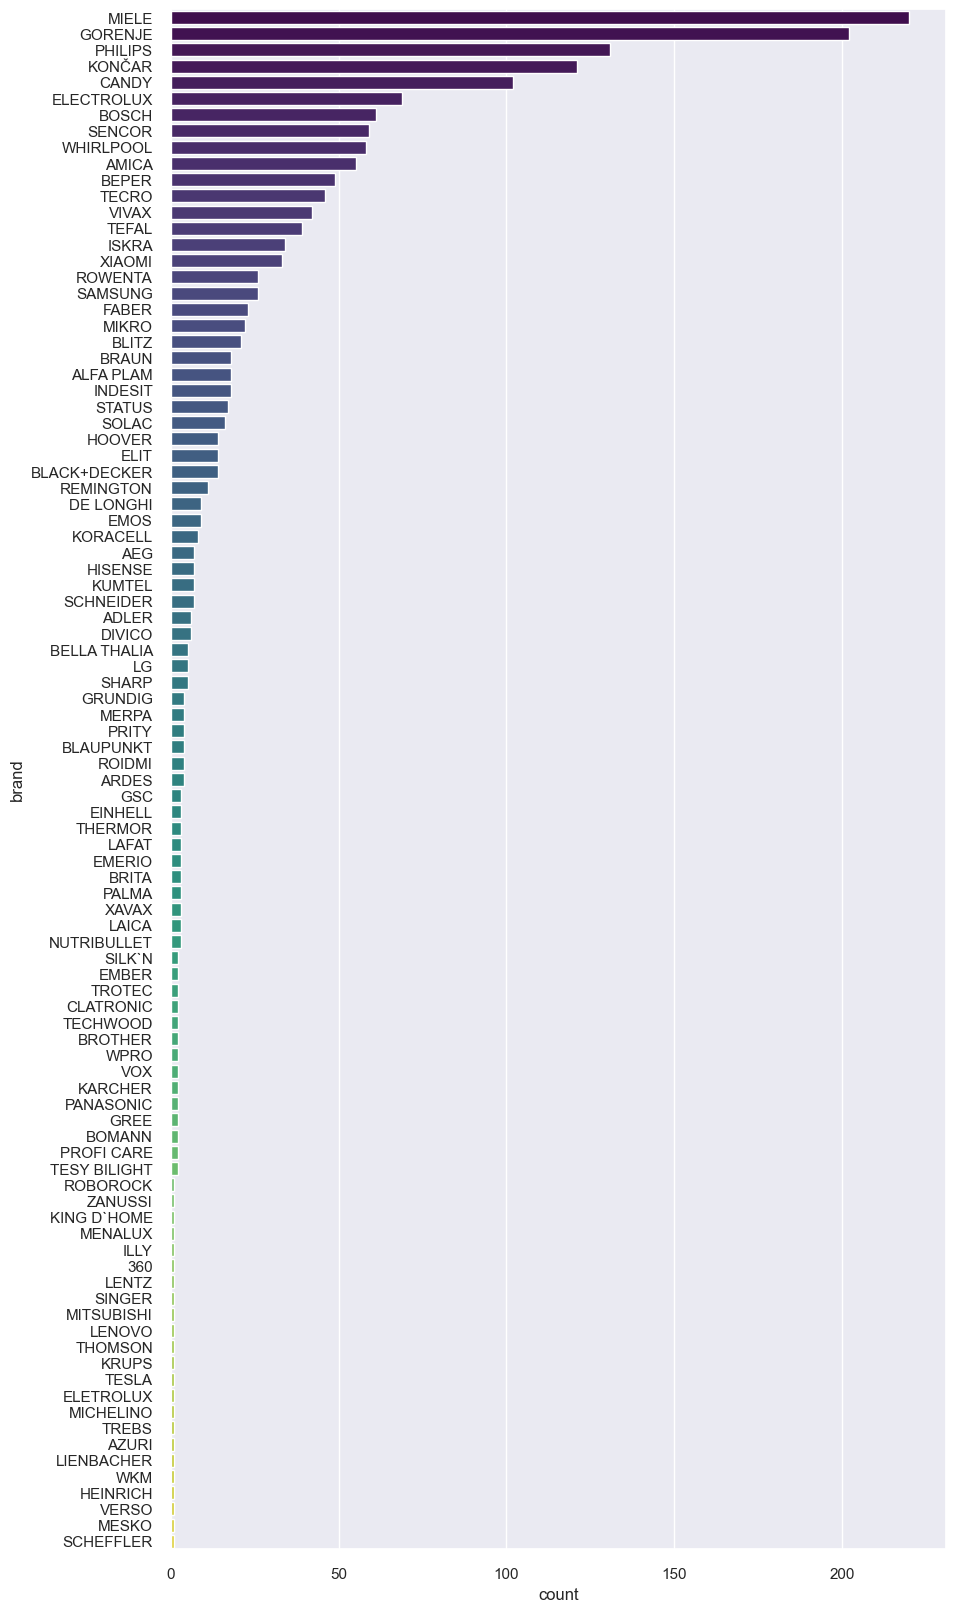

In [38]:
mpl.rcParams['font.size'] = 1
sns.set(style="darkgrid")
plt.figure(figsize=(10,20))
ax=sns.countplot(y='brand', data=data, palette='viridis', order=data['brand'].value_counts().index)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

brand_counts = data['brand'].value_counts()
mostfbrands = brand_counts[brand_counts > 100]

# Print the list of popular products
print("The most frequent brands in the offer:")
print(mostfbrands)
plt.show()

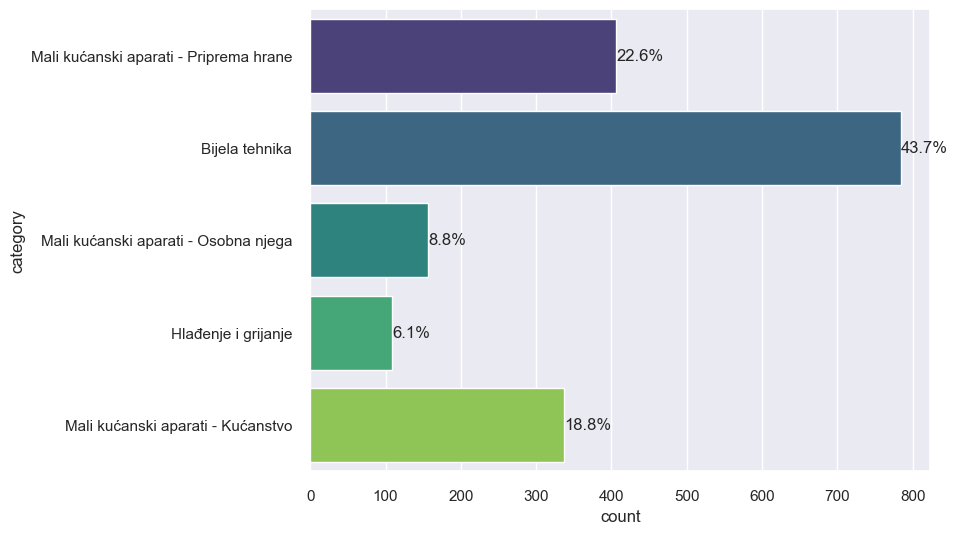

In [39]:
plt.figure(figsize=(8, 6))  # adjust the figure size as needed
total = len(data['category'])
ax = sns.countplot(y='category', data=data, palette='viridis')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), ha='left', va='center')
plt.show()

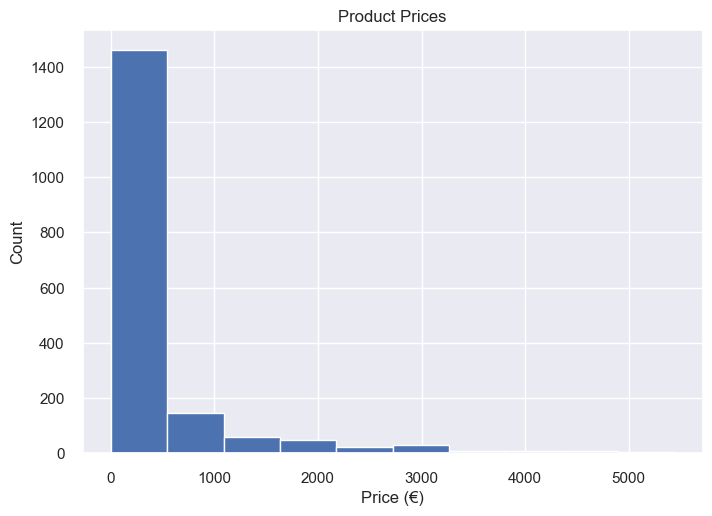

In [40]:

plt.hist(data.euro_price, bins=10)

# Add a title and axis labels
plt.title('Product Prices')
plt.xlabel('Price (€)')
plt.ylabel('Count')

# Show the plot
plt.show()

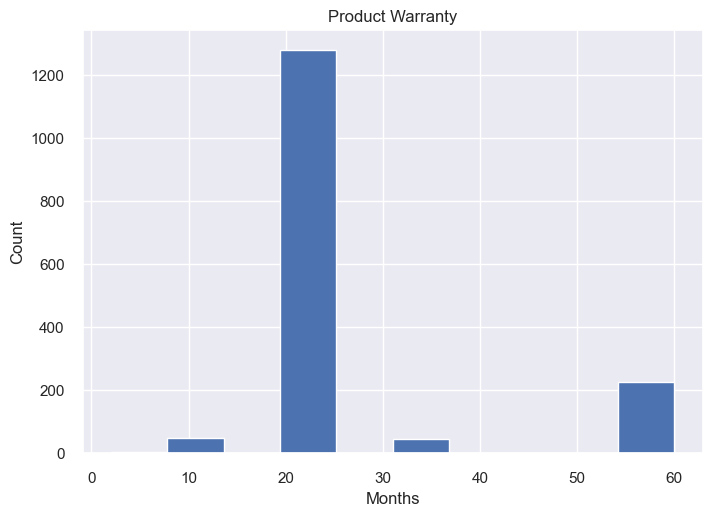

In [41]:
plt.hist(data.warranty_months)

# Add a title and axis labels
plt.title('Product Warranty')
plt.xlabel('Months')
plt.ylabel('Count')

# Show the plot
plt.show()

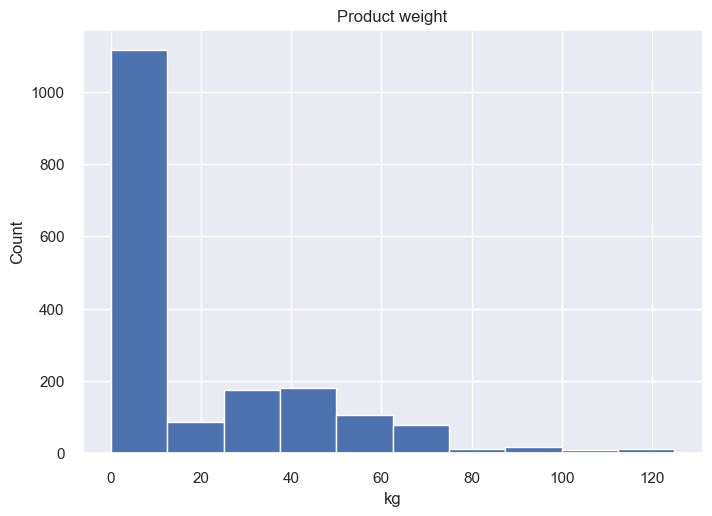

In [42]:
plt.hist(data.weight_kg, bins=10)

# Add a title and axis labels
plt.title('Product weight')
plt.xlabel('kg')
plt.ylabel('Count')

# Show the plot
plt.show()

In this section I performed short Desriptive anlyisis of the pevex dataset (data), where we could see that:

   The most frequent brands in the offer:MIELE (220), GORENJE(202), PHILIPS(131), KONČAR(121),CANDY(102)
    
   The majority of products belongs in subcategory - Bijela tehnika(43,7%)
    
   The majority of products have price less than 600 €
   
   24 months is the most frequent warranty period of the products
   
   The majority of products are less than 20kg


# DATA PREPROCESSING

In order to do Kmeans clustering we need to preprocess data, for Kmeans I am going to use dataset dataIQR.

Code to get the list of categorical variables from my dataset. 

In [43]:
#Get list of categorical variables
s = (dataIQR.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['category', 'brand', 'model', 'model_description', 'size_cat']


Next code uses LabelEncoder() to encode the categorical variables 'category' and 'size_cat'. I have chosen those beacuse I will use those two in further analysis.

The LabelEncoder() function is initialized and stored in the variable 'LE'.

Then, the 'fit_transform()' method of LabelEncoder() is applied to the 'category' column, and the resulting encoded values are stored in a new column called 'cat_leb'. Similarly, the 'fit_transform()' method is applied to the 'size_cat' column, and the encoded values are stored in a new column called 'size'.

In [44]:
LE = LabelEncoder()

dataIQR['cat_leb'] = LE.fit_transform(dataIQR['category'])
dataIQR['size'] = LE.fit_transform(dataIQR['size_cat'])

I have used the dropna() method to remove any rows that contain missing values in the columns 'length_cm' and 'height_cm'.

In [45]:
dataIQR.dropna(subset=['length_cm'], inplace=True)
dataIQR.dropna(subset=['height_cm'], inplace=True)

In [46]:
dataIQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 2019
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1600 non-null   int64  
 1   code               1600 non-null   int64  
 2   category           1600 non-null   object 
 3   brand              1576 non-null   object 
 4   model              1592 non-null   object 
 5   model_description  1600 non-null   object 
 6   warranty_months    1418 non-null   float64
 7   weight_kg          1600 non-null   float64
 8   height_cm          1600 non-null   float64
 9   width_cm           1600 non-null   float64
 10  length_cm          1600 non-null   float64
 11  euro_price         1600 non-null   float64
 12  kuna_price         1600 non-null   float64
 13  size_cm3           1600 non-null   float64
 14  size_cat           1600 non-null   object 
 15  cat_leb            1600 non-null   int32  
 16  size               1600 

Next code selects a subset of columns from the dataframe dataIQR and creates a new dataframe data2. The new dataframe includes columns weight_kg, height_cm, width_cm, length_cm, and euro_price.
I am going to use this dataframe for K-means clustering, so I have selected the relevant features that are important for clustering. 
It is important to make sure that the data is properly preprocessed before using it for clustering, such as scaling the data.

In [47]:
data2=dataIQR[['weight_kg', 'height_cm', 'width_cm', 'length_cm',
       'euro_price']]
data2

,weight_kg,height_cm,width_cm,length_cm,euro_price
0,5.800,32.00,33.0,31.0,99.41
1,1.200,39.00,6.0,8.0,78.17
2,1.580,35.00,25.0,22.0,43.67
3,0.350,2.00,17.0,21.0,10.49
4,2.100,31.00,8.0,27.0,19.90
...,...,...,...,...,...
1997,0.086,1.70,9.3,23.2,8.49
1998,6.000,0.45,29.0,51.0,123.30
1999,5.000,0.45,29.0,51.0,99.41
2000,42.000,85.00,50.0,60.0,265.31


The code creates a new DataFrame named "data2" which is the scaled version of the original data. The fit_transform method of the StandardScaler class is used to fit the scaler to the data and transform it in one step. The resulting scaled data is assigned back to the "data2" DataFrame.

In [48]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scale=StandardScaler()
data2=pd.DataFrame(scale.fit_transform(data2), columns=data2.columns)
data2.head()

Dataframe to be used for further modelling:


,weight_kg,height_cm,width_cm,length_cm,euro_price
0,-0.481186,-0.357498,-0.213293,-0.353489,-0.540287
1,-0.673537,-0.199992,-1.404380,-1.517417,-0.636492
2,-0.657647,-0.289995,-0.566207,-0.808939,-0.792756
3,-0.709080,-1.032521,-0.919122,-0.859545,-0.943041
4,-0.635903,-0.379998,-1.316151,-0.555912,-0.900419


# DIMENSIONALITY REDUCTION

This code performs Principal Component Analysis (PCA) on the data stored in data2 and then creates a scatter plot to visualize the first two principal components of the transformed data X_pca.

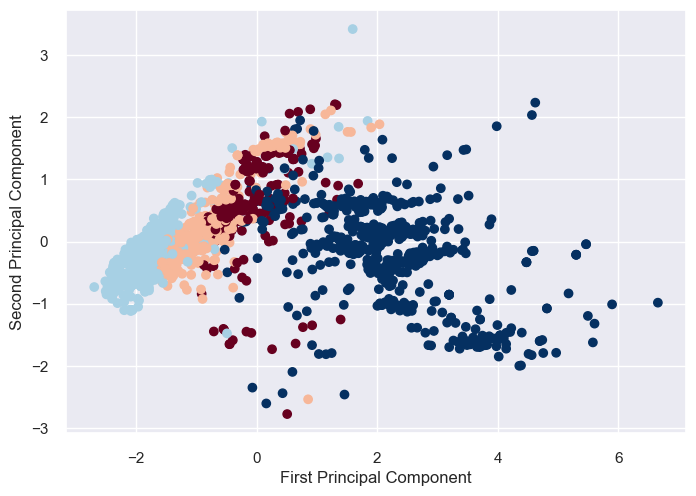

In [49]:
X = data2

y = dataIQR["size"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data2)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='RdBu')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Next code reduces the dimensionality of data2 to 3 principal components using PCA and outputs descriptive statistics and explained variance ratios for the transformed data.
print(pca.explained_variance_ratio_) prints the explained variance ratio for each principal component. The explained variance ratio represents the proportion of the total variance of the original data that is explained by each principal component.

In [50]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(data2)
PCA_ds = pd.DataFrame(pca.transform(data2), columns=(["col1","col2","col3"]))
PCA_ds.describe().T
print(pca.explained_variance_ratio_)

[0.70196126 0.11700682 0.07959066]


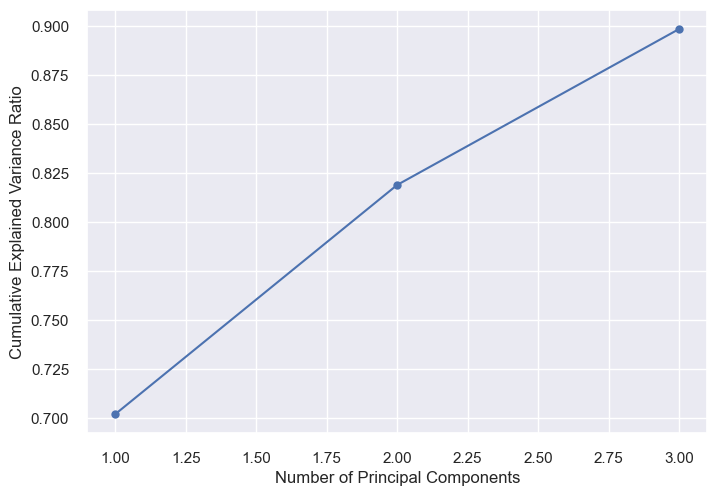

In [51]:
# get the explained variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# calculate the cumulative explained variance
cumulative_variance = np.cumsum(variance_ratio)

# plot the cumulative explained variance against the number of components
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, '-o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

Next code creates a 3D scatter plot of data in a reduced dimension

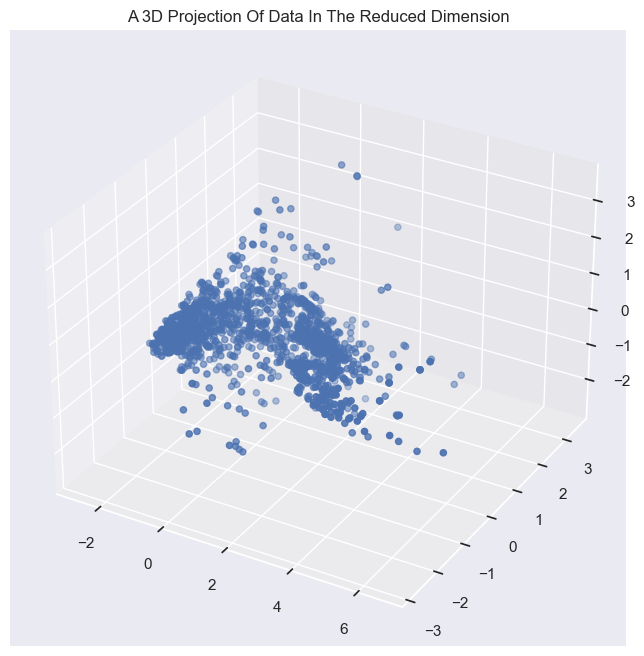

In [52]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

Next code is using the elbow method to determine the optimal number of clusters to use for a k-means clustering algorithm. The code is using the KElbowVisualizer module from the yellowbrick library, which is a visualization library for machine learning.

Elbow Method to determine the number of clusters to be formed:


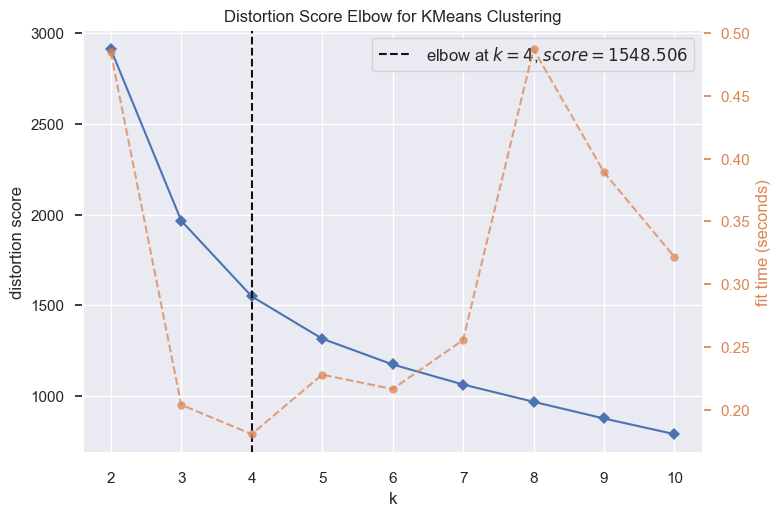

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

After we established the optimal number of clusters, the next code is performing K-Means clustering on a reduced dimension dataset represented by PCA_ds. 

In [54]:
clustering=KMeans(n_clusters=4)
clustering.fit(PCA_ds)
clustering.labels_
PCA_ds["Clusters"]=clustering.labels_
dataIQR["Clusters"]=clustering.labels_
data2["Clusters"]=clustering.labels_

Next, I am plotting the clusters obtained from the KMeans clustering on a three-dimensional scatter plot. 

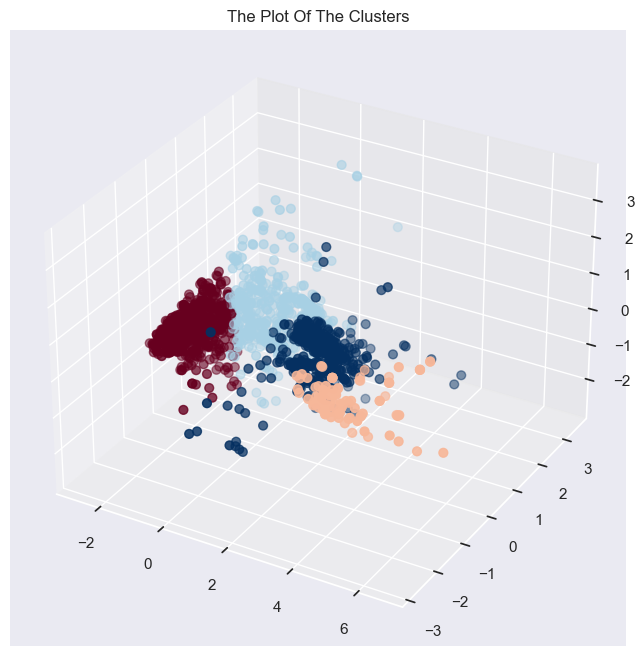

In [55]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'RdBu' )
ax.set_title("The Plot Of The Clusters")
plt.show()

Next code creates a count plot of the clusters obtained from KMeans clustering.

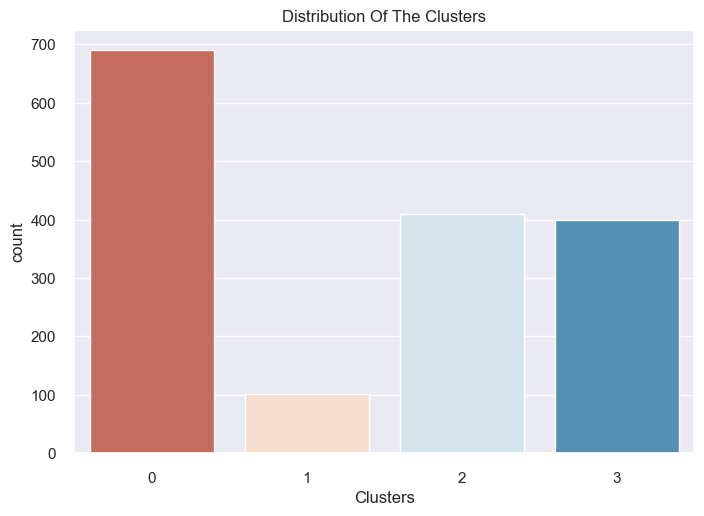

In [56]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data2["Clusters"], palette='RdBu')
pl.set_title("Distribution Of The Clusters")
plt.show()

Fallowing code creates a scatter plot to visualize the relationship between two variables (price and weight) for each data point in the dataIQR, with the color of each point representing the cluster it belongs to.

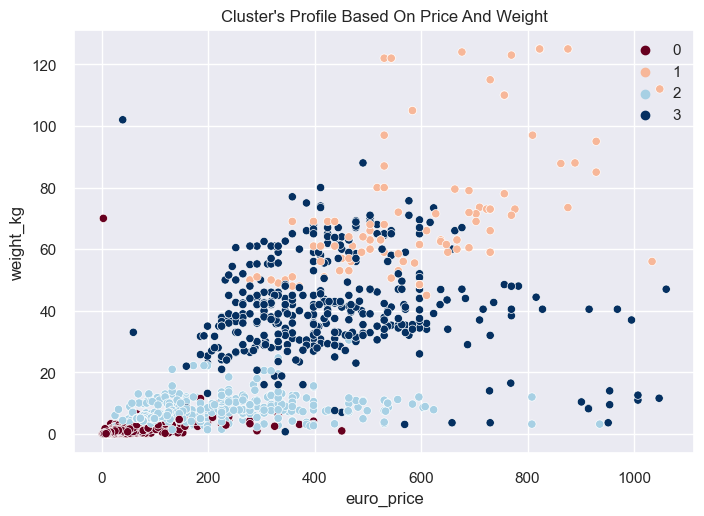

In [57]:
pl = sns.scatterplot(data = dataIQR,x=dataIQR["euro_price"], y=dataIQR["weight_kg"],hue=dataIQR["Clusters"], palette='RdBu')
pl.set_title("Cluster's Profile Based On Price And Weight")
plt.legend()
plt.show()

Next code creates a count plot to visualize the distribution of product categories within each cluster obtained from KMeans clustering.

From the plot is evident that the 0 cluster mainly includes subcategories of 'Mali kućanski aparati', while in the other three clusters 'Bijela tehnika' category dominates.

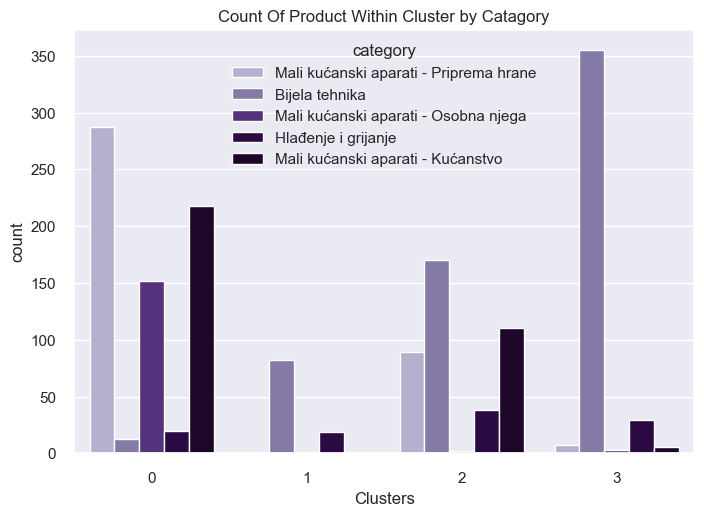

In [58]:
colors = ['#b2abd2', '#8073ac', '#542788', '#2d004b', '#1f002c']
plt.figure()
pl = sns.countplot(x=dataIQR["Clusters"],hue=dataIQR["category"], palette=colors)
pl.set_title("Count Of Product Within Cluster by Catagory")
pl.set_xlabel("Clusters")
plt.show()

We can see the same thing from the following code where we have expressed the same relationship through percentages.

<Figure size 800x550 with 0 Axes>

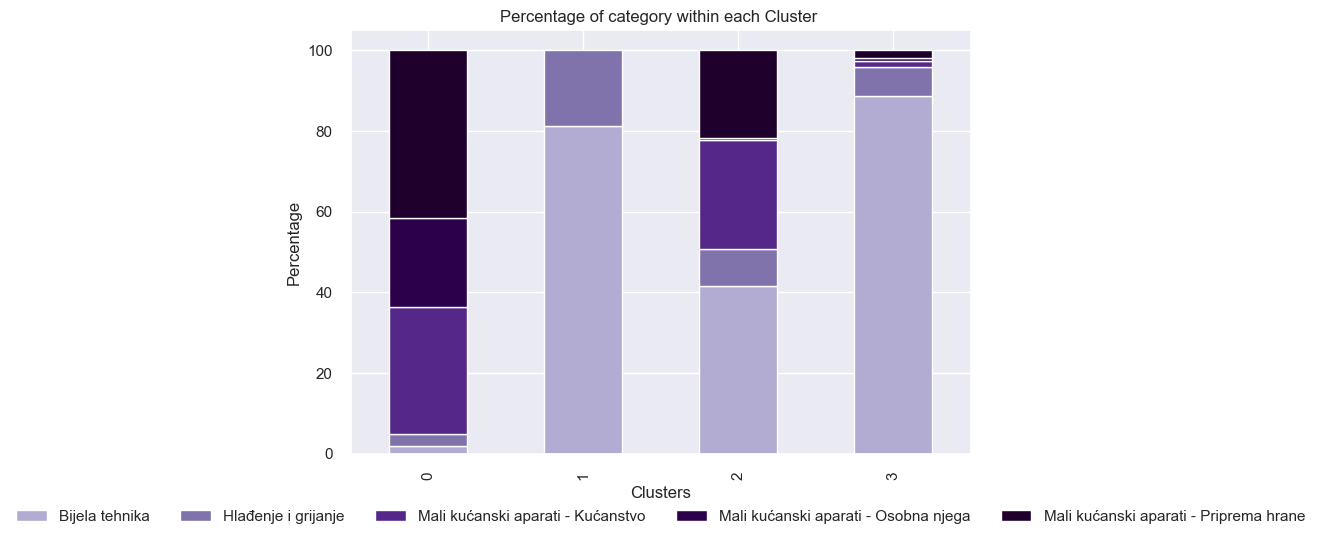

In [59]:
# calculate percentage of each category within each cluster
df_perc = pd.crosstab(index=dataIQR["Clusters"], columns=dataIQR["category"], normalize='index') * 100

colors = ['#b2abd2', '#8073ac', '#542788', '#2d004b', '#1f002c']
cmap = mcolors.ListedColormap(colors)

# plot the percentages using a stacked bar plot
plt.figure()
pl = df_perc.plot(kind="bar", stacked=True, cmap=cmap)
pl.set_title("Percentage of category within each Cluster ")
pl.set_xlabel("Clusters")
pl.set_ylabel("Percentage")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In the sam way, next code creates a stacked bar plot to visualize the percentage of each size category within each cluster obtained from KMeans clustering.

From this we can see that the zero cluster is dominated by products of size 's', in the first and fourth by size 'xl', while the third consists of products of size 'm' and 'l'.

<Figure size 800x550 with 0 Axes>

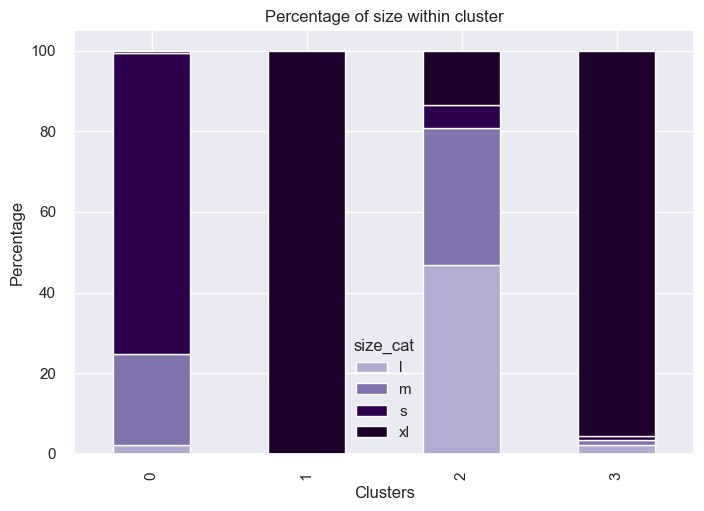

In [60]:
# calculate percentage of each category within each cluster
df_perc = pd.crosstab(index=dataIQR["Clusters"], columns=dataIQR["size_cat"], normalize='index') * 100

colors = ['#b2abd2', '#8073ac', '#542788', '#2d004b', '#1f002c']
cmap = mcolors.ListedColormap(colors)

# plot the percentages using a stacked bar plot
plt.figure()
pl = df_perc.plot(kind="bar", stacked=True,cmap=cmap)
pl.set_title("Percentage of size within cluster")
pl.set_xlabel("Clusters")
pl.set_ylabel("Percentage")
plt.show()

This code creates two plots to visualize the distribution of euro prices for each cluster: a swarm plot, which shows the individual data points for each cluster, and a boxen plot, which shows the distribution of values for each cluster. These plots can help identify any patterns or differences in the prices of products that belong to each cluster.

In [ ]:
plt.figure()
pl=sns.swarmplot(x=dataIQR["Clusters"], y=dataIQR["euro_price"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=dataIQR["Clusters"], y=dataIQR["euro_price"], palette=colors)
plt.show()

With the next code I am going to summarize the key characteristics of each cluster and in order to describe differences in the features of products that belong to each cluster.

This code uses the groupby function to group the data in the "dataIQR" dataframe by cluster and calculate various statistical measures for each feature. Specifically, the code calculates the mean, median, standard deviation, and interquartile range for the "weight_kg", "height_cm", "width_cm", "length_cm", and "euro_price" columns for each cluster.

In [ ]:
# Use the groupby function to group the data by cluster and calculate the mean, median, standard deviation, and interquartile range for each feature
cluster_stats = dataIQR[['Clusters', 'weight_kg', 'height_cm', 'width_cm', 'length_cm', 'euro_price']].groupby('Clusters').agg([np.mean, np.std, np.median, lambda x: np.percentile(x, q=75) - np.percentile(x, q=25)])

# Rename the columns to include the corresponding statistics
cluster_stats.columns = ['{}_{}'.format(col, stat) for col, stat in cluster_stats.columns]

# Print the statistical parameters for each cluster
display(cluster_stats)

Since our distributions are not normaly distributed I am going to use median and IQR for descriptions of clusters. So in next few lines are boxplots clusters and selected product features. This provides a clear and concise way to visualize the distribution of product features for each cluster.

In [ ]:
sns.boxplot(x='Clusters', y='weight_kg', data=dataIQR, palette=colors)
plt.title('Weight by Cluster')
plt.show()

In [ ]:
sns.boxplot(x='Clusters', y='height_cm', data=dataIQR, palette=colors)
plt.title('Height by Cluster')
plt.show()

In [ ]:
sns.boxplot(x='Clusters', y='euro_price', data=dataIQR, palette=colors)
plt.title('Median Price by Cluster')
plt.show()

In [ ]:
sns.boxplot(x='Clusters', y='length_cm', data=dataIQR, palette=colors)
plt.title('Length by Cluster')
plt.show()

Final code shows parallel coordinates plot. Parallel coordinates plot is a way to compare the feature profiles of different groups or clusters. In this plot, each vertical line represents one variable, and each line connecting the points across the vertical lines represents one data point. The color of each line is determined by the cluster to which that data point belongs.

In [ ]:
fig = px.parallel_coordinates(data2, color='Clusters')
fig.show()

Description of clusters:

Cluster 0(Low price small home appliances cluster): This is the largest cluster and the most frequent category is 'Mali kućanski aparati'. The most frequent size in this cluster is 'S'. The median weight is 0.98 kg with an interquartile range (IQR) of 1.22 kg, the median height is 22 cm with an IQR of 13.75 cm, the median width is 17 cm with an IQR of 14 cm, the median length is 20 cm with an IQR of 15.75 cm, and the median price is 30.46 € with an IQR of 38.63 €.

Cluster 1(Very expensive and very big white goods products): This is the smallest cluster, and the most frequent category is 'Bijela tehnika'. The most frequent size in this cluster is 'XL'. The median weight is 66 kg with an IQR of 23 kg, the median height is 178 cm with an IQR of 48 cm, the median width is 60 cm with an IQR of 5 cm, the median length is 62 cm with an IQR of 7 cm, and the median price is 597.12 € with an IQR of 238.90 €.

Cluster 2(Mid-price mid-size all categories products): This is a mid-size cluster that includes all categories of products. The most frequent sizes in this cluster are 'M' and 'L'. The median weight is 6.89 kg with an IQR of 4.9 kg, the median height is 26 cm with an IQR of 20 cm, the median width is 48 cm with an IQR of 28 cm, the median length is 47 cm with an IQR of 16 cm, and the median price is 159.13 € with an IQR of 179.17 €.

Cluster 3(expensive big white goods products): This is also a mid-size cluster, and the most frequent category is 'Bijela tehnika'. The most frequent size in this cluster is 'XL'. The median weight is 39 kg with an IQR of 16.53 kg, the median height is 85 cm with an IQR of 25 cm, the median width is 60 cm with an IQR of 6 cm, the median length is 56 cm with an IQR of 7 cm, and the median price is 406 € with an IQR of 199.09 €.
